 <h1 style="font-size:6rem;color:Blue;align:center"> P.F.M.S</h1>
 <h1 style="font-size:2rem;color:Green;"> (Personal Finance Management System)</h1>

 <h1 style="font-size:5rem;color:red;"> Introduction</h1>




Personal Finance Management System (PFMS) is a system developed to help people manage their finances.
Most people tend to mismanage their income, either by impulse buying, wrong priorities, over-spending; this make them
not SAVE or INVEST. Thus leading to no growth financially.

The System also helps people/families(households) realize which economic classes they belong and how to adjust to a higher economic class or how they can maintain in the prefered economic class.

PFMS helps them relate/compare with best performing families, by their priorities, HOW & WHERE they spend their income: 


<h1 style="font-size:3rem;color:blue;"> Details on the dataset</h1>

##### Title: Philippines Poverty Level Estimates


The Dataset used is from several municipal-cities in Philippines, which shows the expenditure of low-level households.It indicates how the families spend on different utilities. There are two categories economically, where there are ones who are stabler than others, where the factor is their expenditure.


Link Address:

https://data.world/am-red-cross/d9df3633-8775-435e-9362-6fa218bf4331/file/phl-cityandmunicipallevelpovertyestimates-csv-1.csv



#### Sources:

##### Red-Cross poverty level estimates
link
https://data.world/am-red-cross/d9df3633-8775-435e-9362-6fa218bf4331/discuss/d9df3633-8775-435e-9362-6fa218bf4331/ytuexfnx?type=comment

Link: https://data.world/am-red-cross/d9df3633-8775-435e-9362-6fa218bf4331


##### another dataset


Canadian Consumer Price Index

https://data.world/awram/canadian-consumer-price-index/file/canada_cpi.csv

Poverty rate

Highlights about poverty for children under 18years


link : https://data.world/chhs/4ea80791-c308-4026-8a94-0e9070b53929


<h1 style="font-size:3rem;color:blue;"> Goal.  Problem Statement:</h1>

To develop a model that will help families know how to priotize their utilities when spending their incomes and realizing which Economic Class they belong.

 <h1 style="font-size:4rem;color:red;"> How it works:</h1>
 <p style="font-size:2rem;color:maroon;">  a. PFMS tracks down your history on how you spend you income(money)
in different utilities across the network.<br> Does the analysis and figuritively classifies you economically.
<br>
    <br>
b. Additionally it gives you the insights on how to improve/save-more/move to the next economic class
<br>
    <br>
c. PFMS shows you the distribution of your expenditure in comparison to standard expenditures which gives 
the insights to how to adjust.</p>      

### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
imporimportt plotly.express as px
 plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score 
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


<h1 style="font-size:2rem;color:blue;"> Loading Dataset</h1>

In [2]:
phl = pd.read_excel("phl_dataset.xlsx").drop(['Unnamed: 0'], axis=1)

phl.head()

PCODE Region      Province Municipality_City  \
0  PH133901000    NCR  1st district             Tondo   
1  PH133902000    NCR  1st district           Binondo   
2  PH133903000    NCR  1st district            Quiapo   
3  PH133904000    NCR  1st district       San Nicolas   
4  PH133905000    NCR  1st district        Santa Cruz   

   Food & non-alcoholic drinks  Clothing & footwear  \
0                         3.14                 0.64   
1                         1.48                 0.62   
2                         2.10                 0.59   
3                         2.95                 1.58   
4                         1.49                 0.29   

   Housing(net)2, fuel & power  Alcoholic drinks, tobacco & narcotics  \
0                    20.382166                                2.08720   
1                    41.891892                                0.46010   
2                    28.095238                                1.12945   
3                    53.559322                                0.35090   
4                    19.463087                                1.01295   

   Household goods & services  Health  Transport  Education Communication  \
0                     4.19280     2.9        0.8       27.5           4.1   
1                     2.49990     1.0        0.7       68.0           1.8   
2                     3.07055     2.1        0.9       42.4           5.3   
3                     5.54910     2.4        1.4       57.0           4.9   
4                     1.96705     1.7        0.5       32.5           4.3   

  Recreation & culture Restaurants & hotels  financial stability  
0                  0.5                 12.6                  0.0  
1                  0.3                 18.1                  0.0  
2                  0.4                  7.9                  0.0  
3                  0.5                  9.6                  0.0  
4                  0.6                 14.3                  0.0

In [3]:
phl.dtypes

PCODE                                     object
Region                                    object
Province                                  object
Municipality_City                         object
Food & non-alcoholic drinks              float64
Clothing & footwear                      float64
Housing(net)2, fuel & power              float64
Alcoholic drinks, tobacco & narcotics    float64
Household goods & services               float64
Health                                   float64
Transport                                float64
Education                                float64
Communication                             object
Recreation & culture                      object
Restaurants & hotels                      object
financial stability                      float64
dtype: object

In [4]:
phl.columns

Index(['PCODE', 'Region', 'Province', 'Municipality_City',
       'Food & non-alcoholic drinks', 'Clothing & footwear',
       'Housing(net)2, fuel & power', 'Alcoholic drinks, tobacco & narcotics',
       'Household goods & services', 'Health', 'Transport', 'Education',
       'Communication', 'Recreation & culture', 'Restaurants & hotels',
       'financial stability'],
      dtype='object')

### column rename

In [5]:
# renaming the columns for easy reading and coding

phl = phl.rename( columns = {'Food & non-alcoholic drinks': 'food',
                            'Clothing & footwear': 'clothing',
                            'Housing(net)2, fuel & power': 'power',
                           'Alcoholic drinks, tobacco & narcotics' : 'entertainment',
                           'Household goods & services' : 'house_items',
                           'Recreation & culture': 'leisure',
                           'Restaurants & hotels':'eats',
                            'financial stability':'poverty'})

In [6]:
phl.columns

Index(['PCODE', 'Region', 'Province', 'Municipality_City', 'food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats', 'poverty'],
      dtype='object')

In [7]:
phl.head()

PCODE Region      Province Municipality_City  food  clothing  \
0  PH133901000    NCR  1st district             Tondo  3.14      0.64   
1  PH133902000    NCR  1st district           Binondo  1.48      0.62   
2  PH133903000    NCR  1st district            Quiapo  2.10      0.59   
3  PH133904000    NCR  1st district       San Nicolas  2.95      1.58   
4  PH133905000    NCR  1st district        Santa Cruz  1.49      0.29   

       power  entertainment  house_items  Health  Transport  Education  \
0  20.382166        2.08720      4.19280     2.9        0.8       27.5   
1  41.891892        0.46010      2.49990     1.0        0.7       68.0   
2  28.095238        1.12945      3.07055     2.1        0.9       42.4   
3  53.559322        0.35090      5.54910     2.4        1.4       57.0   
4  19.463087        1.01295      1.96705     1.7        0.5       32.5   

  Communication leisure  eats  poverty  
0           4.1     0.5  12.6      0.0  
1           1.8     0.3  18.1      0.0  
2           5.3     0.4   7.9      0.0  
3           4.9     0.5   9.6      0.0  
4           4.3     0.6  14.3      0.0

In [8]:
phl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCODE              1646 non-null   object 
 1   Region             1647 non-null   object 
 2   Province           1647 non-null   object 
 3   Municipality_City  1647 non-null   object 
 4   food               1646 non-null   float64
 5   clothing           1646 non-null   float64
 6   power              1646 non-null   float64
 7   entertainment      1646 non-null   float64
 8   house_items        1646 non-null   float64
 9   Health             1647 non-null   float64
 10  Transport          1647 non-null   float64
 11  Education          1646 non-null   float64
 12  Communication      1647 non-null   object 
 13  leisure            1647 non-null   object 
 14  eats               1647 non-null   object 
 15  poverty            1646 non-null   float64
dtypes: float64(9), object(7)

# Exploratory Data Analysis


In [9]:
#replacing the string values

phl = phl.replace('-',0)

In [10]:
# rounding off the values

columns = ['food', 'clothing','power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education','Communication', 'leisure', 'eats']
for column in columns:
    phl[column] = phl[column].astype(float).round(1)
    

In [11]:
phl.head()

PCODE Region      Province Municipality_City  food  clothing  power  \
0  PH133901000    NCR  1st district             Tondo   3.1       0.6   20.4   
1  PH133902000    NCR  1st district           Binondo   1.5       0.6   41.9   
2  PH133903000    NCR  1st district            Quiapo   2.1       0.6   28.1   
3  PH133904000    NCR  1st district       San Nicolas   3.0       1.6   53.6   
4  PH133905000    NCR  1st district        Santa Cruz   1.5       0.3   19.5   

   entertainment  house_items  Health  Transport  Education  Communication  \
0            2.1          4.2     2.9        0.8       27.5            4.1   
1            0.5          2.5     1.0        0.7       68.0            1.8   
2            1.1          3.1     2.1        0.9       42.4            5.3   
3            0.4          5.5     2.4        1.4       57.0            4.9   
4            1.0          2.0     1.7        0.5       32.5            4.3   

   leisure  eats  poverty  
0      0.5  12.6      0.0  
1      0.3  18.1      0.0  
2      0.4   7.9      0.0  
3      0.5   9.6      0.0  
4      0.6  14.3      0.0

###  Missing Values

In [12]:
# checking null values

phl.isna().sum()

PCODE                1
Region               0
Province             0
Municipality_City    0
food                 1
clothing             1
power                1
entertainment        1
house_items          1
Health               0
Transport            0
Education            1
Communication        0
leisure              0
eats                 0
poverty              1
dtype: int64

In [13]:
phl.dropna(inplace=True)

In [14]:
phl.isna().sum()

PCODE                0
Region               0
Province             0
Municipality_City    0
food                 0
clothing             0
power                0
entertainment        0
house_items          0
Health               0
Transport            0
Education            0
Communication        0
leisure              0
eats                 0
poverty              0
dtype: int64

In [15]:
# check whether 'PCODE' is a unique identifier
# If number of unique values is equal to number of entries then its unique identifier

phl.PCODE.nunique()



1645

In [16]:
# checking for duplicates in the dataframe

duplicates = phl.duplicated().sum()

duplicates

0

In [17]:
phl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 0 to 1646
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCODE              1645 non-null   object 
 1   Region             1645 non-null   object 
 2   Province           1645 non-null   object 
 3   Municipality_City  1645 non-null   object 
 4   food               1645 non-null   float64
 5   clothing           1645 non-null   float64
 6   power              1645 non-null   float64
 7   entertainment      1645 non-null   float64
 8   house_items        1645 non-null   float64
 9   Health             1645 non-null   float64
 10  Transport          1645 non-null   float64
 11  Education          1645 non-null   float64
 12  Communication      1645 non-null   float64
 13  leisure            1645 non-null   float64
 14  eats               1645 non-null   float64
 15  poverty            1645 non-null   float64
dtypes: float64(12), object(4

Text(0, 0.5, 'cities count')

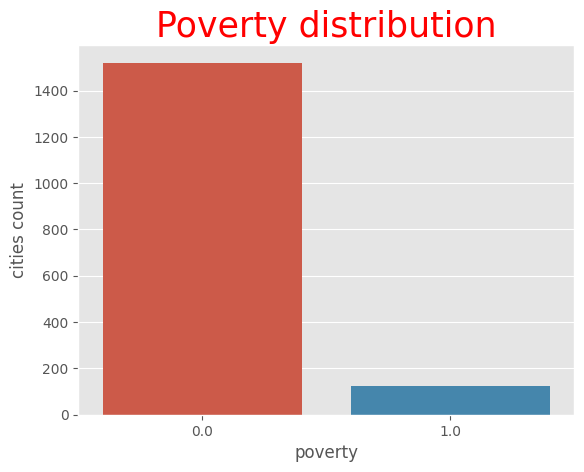

In [18]:
sns.countplot(x=phl.poverty)
plt.title('Poverty distribution', fontsize=25, color='red')
plt.ylabel('cities count')

#### Count

In [19]:
phl.groupby(['poverty']).mean()

food  clothing      power  entertainment  house_items  \
poverty                                                               
0.0      31.057697  3.383553  13.288158      25.490066    36.625461   
1.0      14.088800  2.997600  21.067200       9.156000    19.012800   

            Health  Transport  Education  Communication   leisure       eats  
poverty                                                                       
0.0      33.528816   3.800658  13.815855      33.479539  4.242039  15.197105  
1.0      21.065600   2.360800  11.236800      25.761600  2.992800  12.700000

In [20]:
# dataset characteristics

phl.describe()

food     clothing        power  entertainment  house_items  \
count  1645.000000  1645.000000  1645.000000    1645.000000  1645.000000   
mean     29.768267     3.354225    13.879271      24.248875    35.287112   
std      17.638529     1.800413     7.587033      15.702884    19.828654   
min       0.300000     0.200000     3.300000      -2.800000     0.600000   
25%      15.400000     2.200000     8.800000      11.100000    19.400000   
50%      28.100000     3.100000    12.100000      22.400000    33.600000   
75%      41.200000     4.200000    16.900000      34.900000    48.100000   
max      84.800000    13.400000    84.800000      75.500000    96.900000   

            Health    Transport    Education  Communication      leisure  \
count  1645.000000  1645.000000  1645.000000    1645.000000  1645.000000   
mean     32.581763     3.691246    13.619878      32.893070     4.147112   
std      16.189286     1.803621     7.814853      15.985838     2.150095   
min       1.000000     0.300000     4.400000       0.000000     0.000000   
25%      19.300000     2.400000     8.600000      21.400000     2.700000   
50%      33.600000     3.400000    11.700000      33.200000     3.700000   
75%      45.200000     4.700000    16.200000      44.100000     5.100000   
max      79.900000    13.000000    68.700000      78.300000    18.900000   

              eats      poverty  
count  1645.000000  1645.000000  
mean     15.007356     0.075988  
std       8.345100     0.265059  
min       0.000000     0.000000  
25%       9.700000     0.000000  
50%      12.600000     0.000000  
75%      17.500000     0.000000  
max      67.000000     1.000000

observ:

Mean value of house items and food are very high whereas that of clothing is the lowest

# Feature Engineering

### Data Vizualisation

In [21]:
# getting numerical column for analysis

numerical_cols = phl[['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats']]

numerical_cols.head()

food  clothing  power  entertainment  house_items  Health  Transport  \
0   3.1       0.6   20.4            2.1          4.2     2.9        0.8   
1   1.5       0.6   41.9            0.5          2.5     1.0        0.7   
2   2.1       0.6   28.1            1.1          3.1     2.1        0.9   
3   3.0       1.6   53.6            0.4          5.5     2.4        1.4   
4   1.5       0.3   19.5            1.0          2.0     1.7        0.5   

   Education  Communication  leisure  eats  
0       27.5            4.1      0.5  12.6  
1       68.0            1.8      0.3  18.1  
2       42.4            5.3      0.4   7.9  
3       57.0            4.9      0.5   9.6  
4       32.5            4.3      0.6  14.3

In [22]:
numerical_cols_mean = numerical_cols.mean().reset_index(name='mean')

numerical_cols_mean.head()

index       mean
0           food  29.768267
1       clothing   3.354225
2          power  13.879271
3  entertainment  24.248875
4    house_items  35.287112

In [23]:
numerical_cols_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   11 non-null     object 
 1   mean    11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


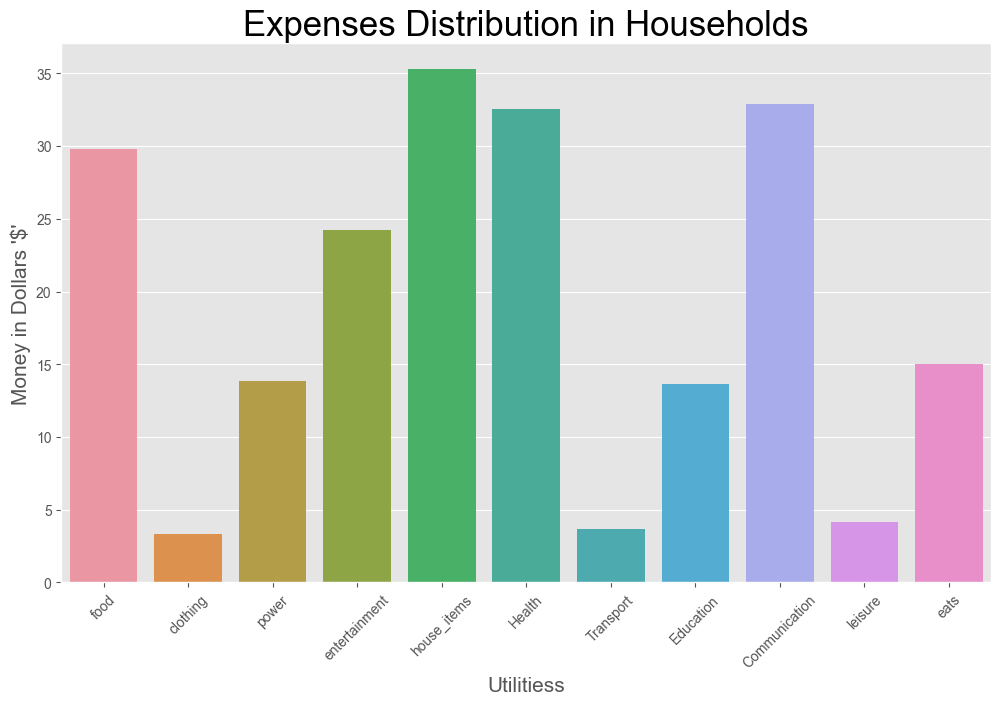

In [24]:
# Plotting distribution of different expenses

plt.figure(figsize=(12,7))
sns.barplot(data=numerical_cols_mean, x='index', y='mean')
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.xticks(rotation=45)
plt.xlabel("Utilitiess",fontsize=15)
plt.ylabel("Money in Dollars '$'", fontsize=15)
plt.title("Expenses Distribution in Households", fontsize=25)


plt.show()

###  Observation:

From the above bar-graph we can see that 'house_items', 'Health', 'food' & 'Communication' consumes alot of money.

Deeply we can see that communication cost is higher than food cost.

Less spending on Leisure, we can assume that its because it is not a basic need unlike most of other utilities.

'Clothing' and 'Transport' cost less than even the 'Leisure'

In [25]:
sum_numerical = numerical_cols.sum().reset_index(name='sum')
sum_numerical.head()

index      sum
0           food  48968.8
1       clothing   5517.7
2          power  22831.4
3  entertainment  39889.4
4    house_items  58047.3

In [26]:
fig = px.bar(sum_numerical, x = 'index', y = 'sum', color = 'index', title = 'Expenditure Distribution'
            
            )


fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    font_size=15,
    title_font_family="Times New Roman",
    title_font_color="red",
    title_font_size=35,
    legend_title_font_color="green",
    legend_title_font_size=20,
    xaxis_title="Household Expenses",
    yaxis_title="Amount in Dollars '$'"
)
fig.show()

#### Observations

Regardless of economic status/class, 'clothing','Transport' & 'Leisure' consumes less money compared to other expenses.

On the other hand 'House_items', 'Health', 'Food' & 'Communication' takes much amount of money across all provinces, this is reasonable since they are basic need to a family.

In [27]:
phl.Region.unique()

array(['NCR', 'CAR', 'Region I', 'Region II', 'Region III', 'Region IV-A',
       'Region IV-B', 'Region V', 'Region VI', 'Region VII',
       'Region VIII', 'Region IX', 'Region X', 'Region XI', 'Region XII',
       'ARMM', 'Caraga'], dtype=object)

In [28]:
# getting numerical features only

numerical_ftrs = ['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats']

In [29]:
# Understanding food cost from different Regions

food_phl = phl.groupby('Region')['food'].mean().reset_index()
food_phl.head()

Region       food
0      ARMM  58.906780
1       CAR  30.559740
2    Caraga  37.386301
3       NCR   2.153333
4  Region I  14.088800

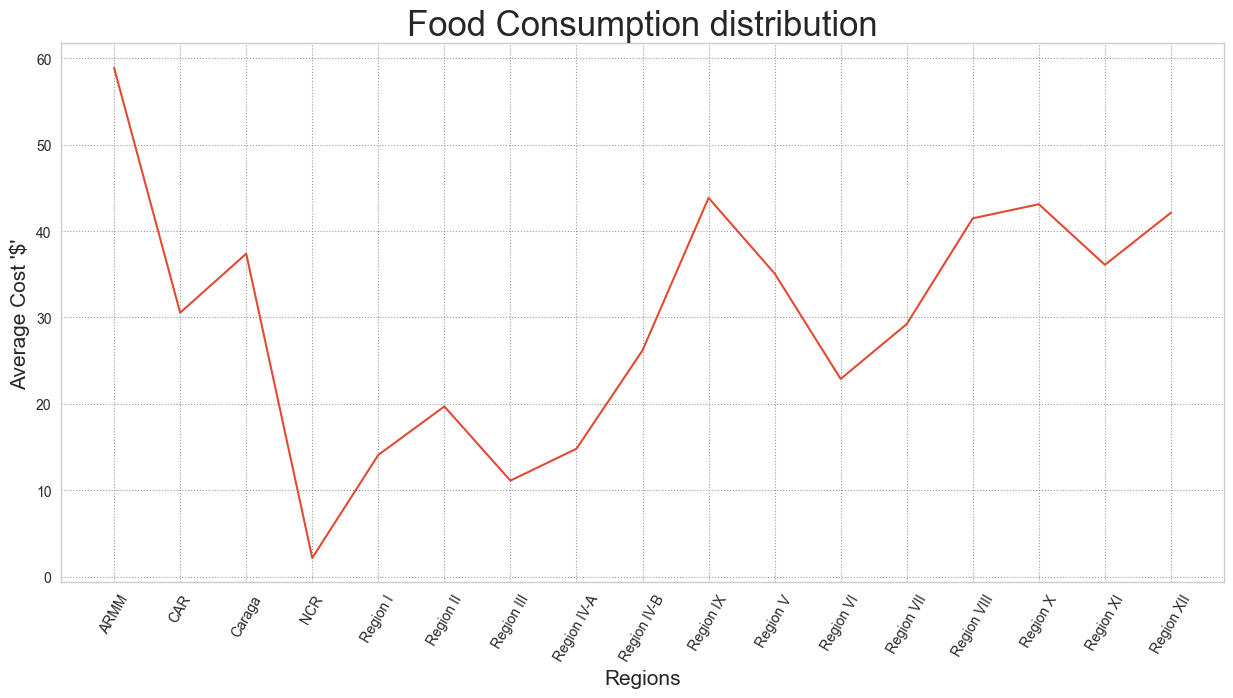

In [30]:
plt.figure(figsize=(15,7))
sns.lineplot(data=food_phl, x='Region', y='food')
plt.ylabel("Average Cost '$'", size=15)
plt.xlabel('Regions', size=15)
plt.title('Food Consumption distribution', size=25)
plt.xticks(rotation=60)

plt.show()

Cost of food in NCR region is the lowest, showing that its a habitable place to stay for less forrtunate families

ARMM Region is the most expensive place to live interms of food cost it being a basic need to every human being.

Generally food cost in most regions is high, assuming those places are very urban

In [31]:
# for Health Sector

Health_phl = phl.groupby('Region')['Health'].mean().reset_index()
Health_phl.head()

Region     Health
0      ARMM  43.575424
1       CAR  34.122078
2    Caraga  47.509589
3       NCR   2.570000
4  Region I  21.065600

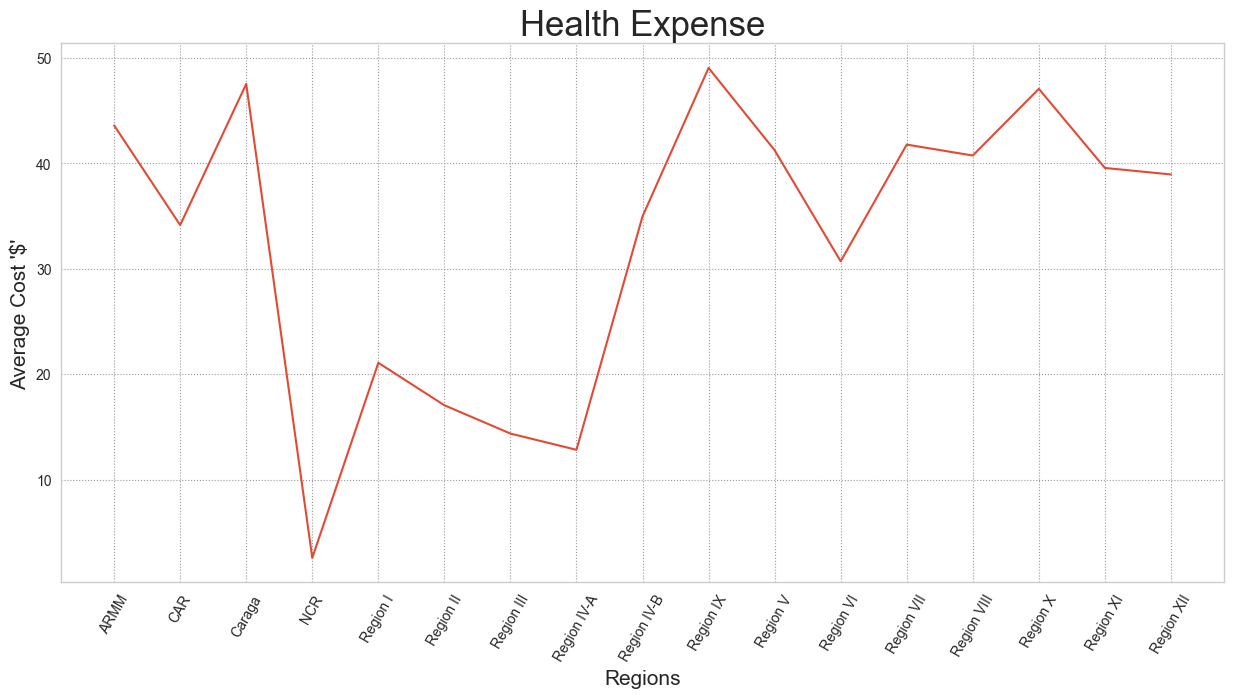

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(data=Health_phl, x='Region', y='Health')
plt.ylabel("Average Cost '$'", size=15)
plt.xlabel('Regions', size=15)
plt.title('Health Expense', size=25)
plt.xticks(rotation=60)

plt.show()

Region 'Caraga' and 'Region IX' have the highest expense interm of Health cost

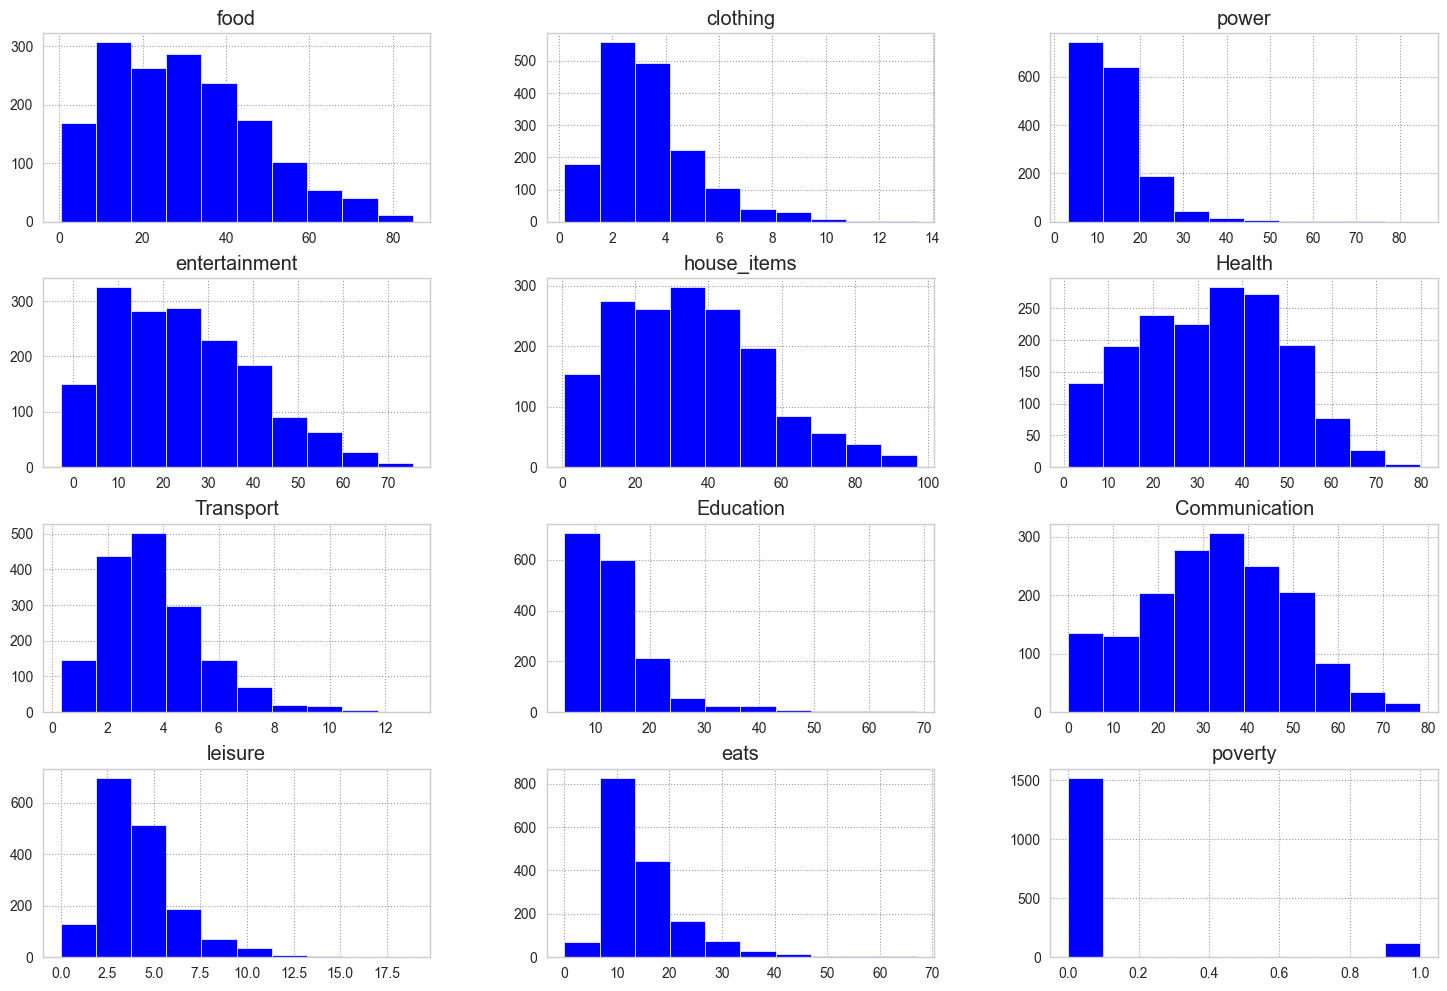

In [33]:
# plotting a histogram of every feature

phl.hist(figsize=(18,12), color='blue', edgecolor='white')
plt.style.use('bmh')


plt.show()

Good and Services that has average cost consumes highest amount of money in every sector except for 'power'& 'Education'.
For example;
   a) Communication that cost between 30-40 dollars consumes a total of more than 300dollars
    b) Transport of 2-4 takes a total of 500dollars unlike other cost in the transport sector, this can be due to transport means, where many people maybe prefering the cheaper means.


In [34]:
# classifying households in to different economic classes

poverty_class = phl[phl['poverty']==0]

poverty_class.head()

PCODE Region      Province Municipality_City  food  clothing  power  \
0  PH133901000    NCR  1st district             Tondo   3.1       0.6   20.4   
1  PH133902000    NCR  1st district           Binondo   1.5       0.6   41.9   
2  PH133903000    NCR  1st district            Quiapo   2.1       0.6   28.1   
3  PH133904000    NCR  1st district       San Nicolas   3.0       1.6   53.6   
4  PH133905000    NCR  1st district        Santa Cruz   1.5       0.3   19.5   

   entertainment  house_items  Health  Transport  Education  Communication  \
0            2.1          4.2     2.9        0.8       27.5            4.1   
1            0.5          2.5     1.0        0.7       68.0            1.8   
2            1.1          3.1     2.1        0.9       42.4            5.3   
3            0.4          5.5     2.4        1.4       57.0            4.9   
4            1.0          2.0     1.7        0.5       32.5            4.3   

   leisure  eats  poverty  
0      0.5  12.6      0.0  
1      0.3  18.1      0.0  
2      0.4   7.9      0.0  
3      0.5   9.6      0.0  
4      0.6  14.3      0.0

In [35]:
poverty_class_num = poverty_class[['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats']]

table_A = poverty_class_num.mean().reset_index(name="Class_0")
table_A.head()

index    Class_0
0           food  31.057697
1       clothing   3.383553
2          power  13.288158
3  entertainment  25.490066
4    house_items  36.625461

In [36]:
poverty_classb = phl[phl['poverty']==1]

poverty_classb.head()

PCODE    Region      Province Municipality_City  food  clothing  \
107  PH012801000  Region I  Ilocos Norte             Adams  17.9      12.6   
108  PH012802000  Region I  Ilocos Norte           Bacarra  11.4       2.1   
109  PH012803000  Region I  Ilocos Norte             Badoc  14.0       2.4   
110  PH012804000  Region I  Ilocos Norte            Bangui  12.0       2.4   
111  PH012805000  Region I  Ilocos Norte             Batac  11.0       1.9   

     power  entertainment  house_items  Health  Transport  Education  \
107   70.3           -2.8         38.6    29.4        1.1        8.5   
108   18.5            7.9         14.9    13.2        2.3       11.7   
109   17.0           10.1         18.0    19.6        1.4       11.3   
110   20.1            8.0         15.9    12.6        2.1       13.6   
111   17.1            7.9         14.1    15.3        1.6        9.6   

     Communication  leisure  eats  poverty  
107           39.9      0.4  33.3      1.0  
108           11.7      0.5  16.4      1.0  
109           19.6      0.5  11.5      1.0  
110           24.5      0.4  12.0      1.0  
111           11.2      0.4  15.4      1.0

In [37]:
poverty_classb_num = poverty_classb[['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats']]

table_B = poverty_classb_num.mean().reset_index(name="Class_1")
table_B.head()

index  Class_1
0           food  14.0888
1       clothing   2.9976
2          power  21.0672
3  entertainment   9.1560
4    house_items  19.0128

In [38]:
# merging both dataframe

poverty_class = pd.merge(table_A, table_B, how='inner', on=['index'])

poverty_class.head()

index    Class_0  Class_1
0           food  31.057697  14.0888
1       clothing   3.383553   2.9976
2          power  13.288158  21.0672
3  entertainment  25.490066   9.1560
4    house_items  36.625461  19.0128

In [39]:
# for the sake of streamlit we save the data
poverty_class.to_csv("poverty_class.csv")

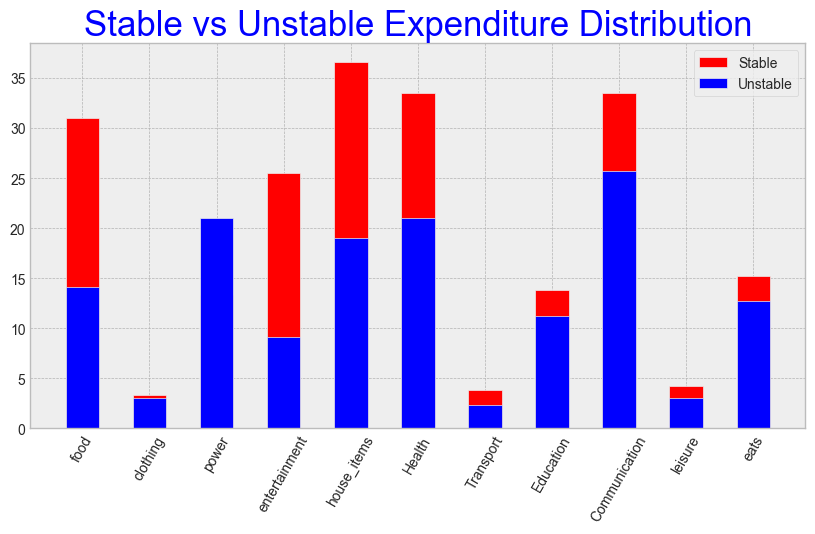

In [41]:
# Goal is to understand how the two classes spend their incomes on different utilities

plt.figure(figsize=(10,5))

plt.bar(poverty_class['index'], poverty_class['Class_0'], label = 'Stable', color = 'r', width=0.5)

plt.bar(poverty_class['index'], poverty_class['Class_1'], label = 'Unstable', color = 'b', width=0.5)


plt.legend()
ggplot_styles = {'axes.edgecolor': 'black',
                'grid.color': 'white'}

plt.title("Stable vs Unstable Expenditure Distribution", fontsize=25, color = 'blue')
plt.xticks(rotation=60)

plt.show()


The unstable families are using equal cost in 'power', which might be pushing them to saving nothing

The less fortunate are using almost equal amount of money in 'clothing', 'Transport', 'Education', 'Leisure' & 'eats' with the stable families

Or else we can say the stable families are spending almost equal amount on 'clothing', 'Transport', 'Education', 'Leisure' & 'eats'
which is helping them to save more money than the unstable families

In [42]:
# pie-chart figure

fig = {
  "data": [
    {
      "values": numerical_cols_mean['mean'],
      "labels": numerical_cols_mean['index'],
      "domain": {"x": [0, .5]},
      "name": "Basic Need",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
    
  "layout": {
        "title":"Utilities Analysis",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Basic need",
                "x": 0.50,
                "y": 3
            },
        ]
    }
}

fig = go.Figure(fig)

fig.show()

### Correlation Matrix

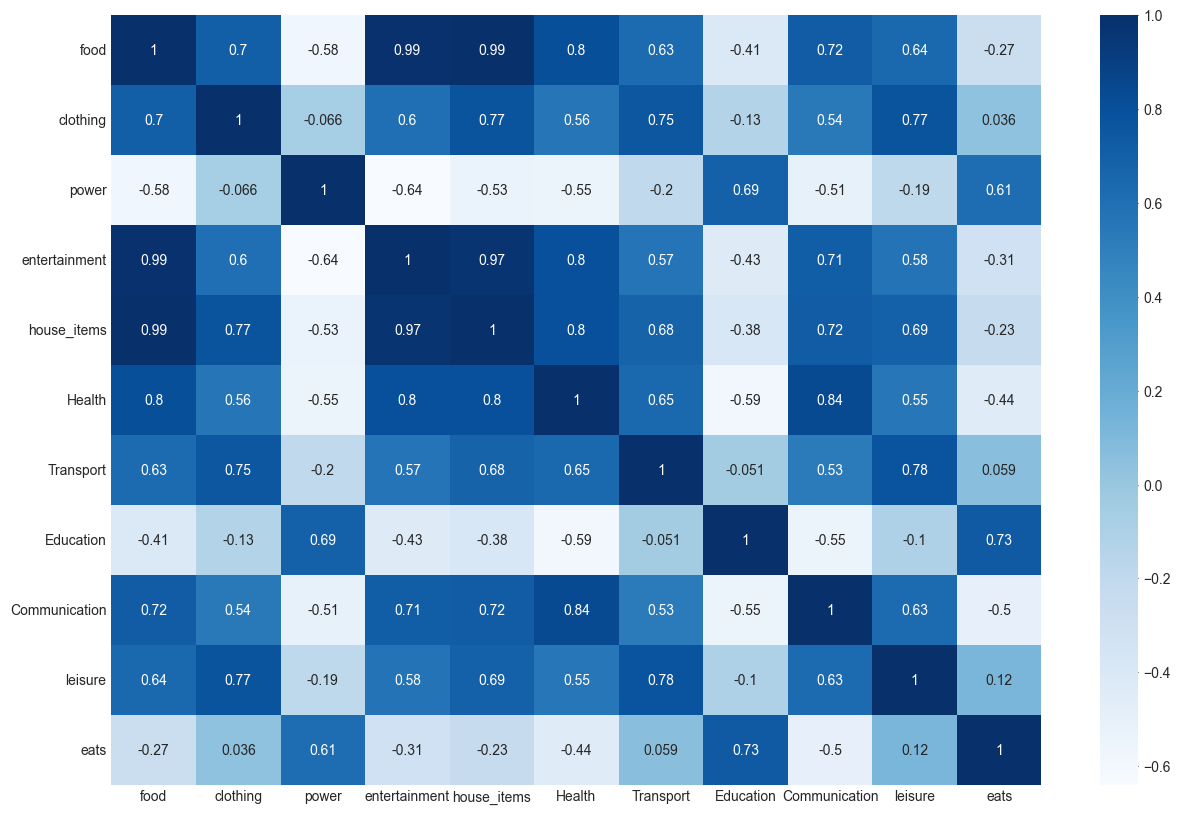

In [43]:
# Using Pearson Correlation

plt.figure(figsize=(15,10))
cor=numerical_cols.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

plt.show()

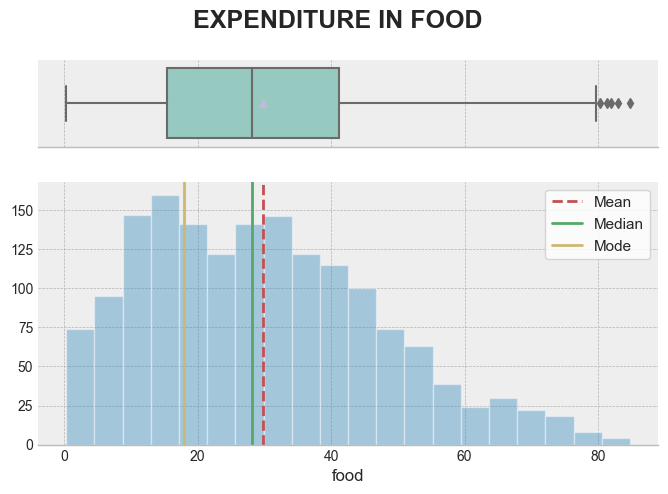

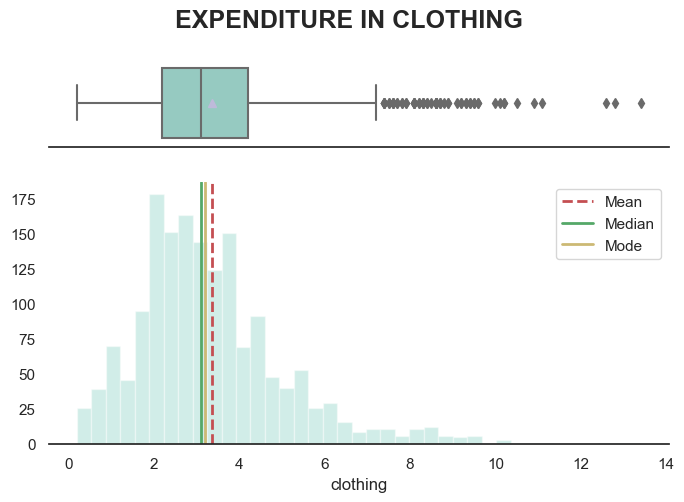

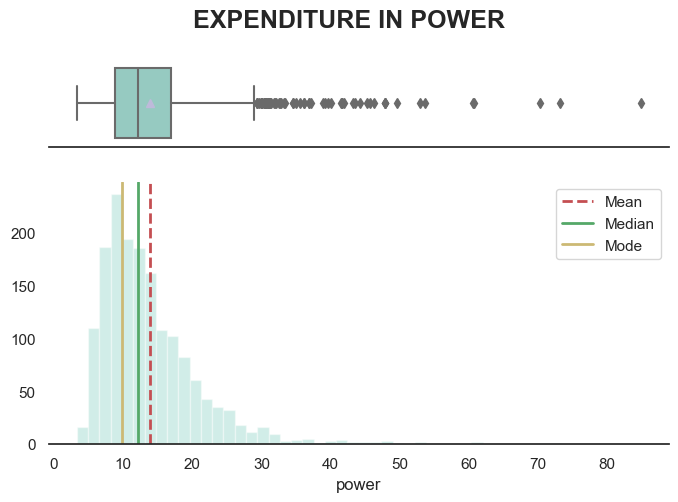

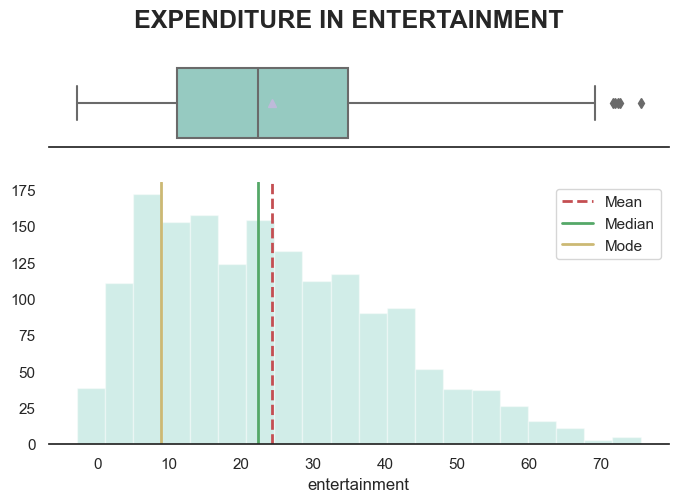

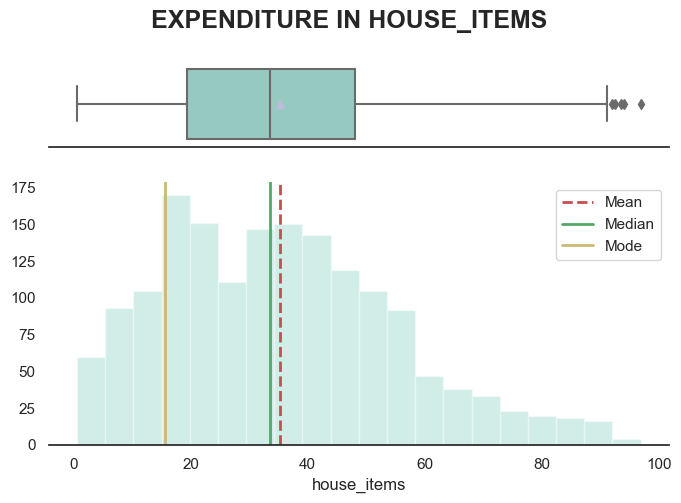

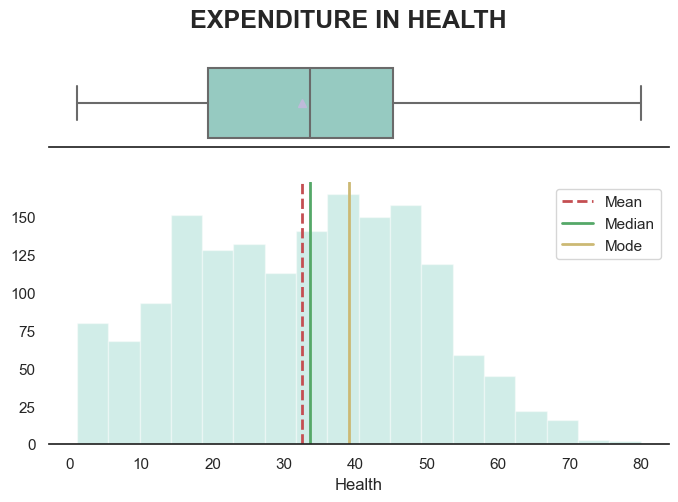

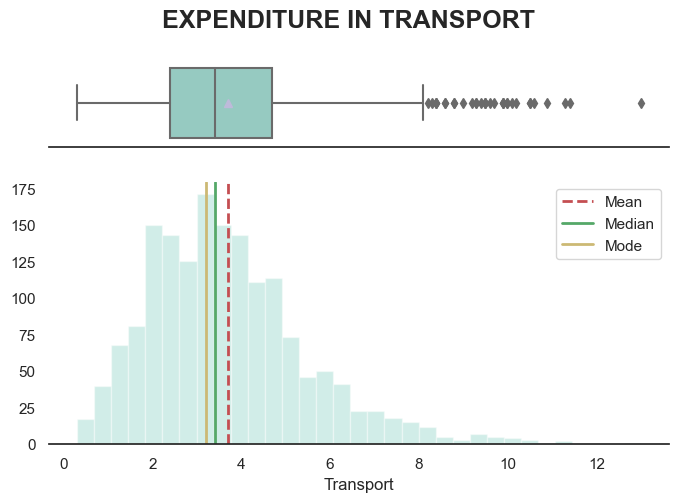

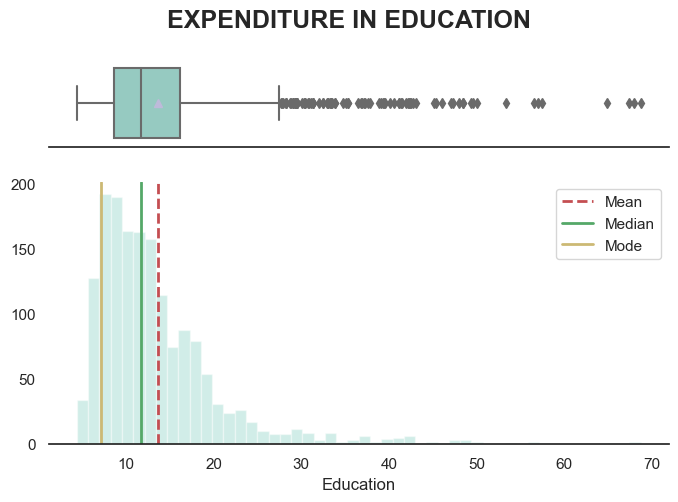

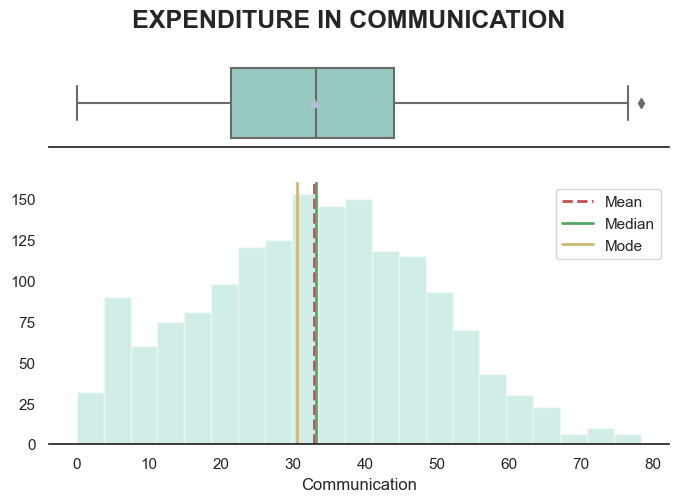

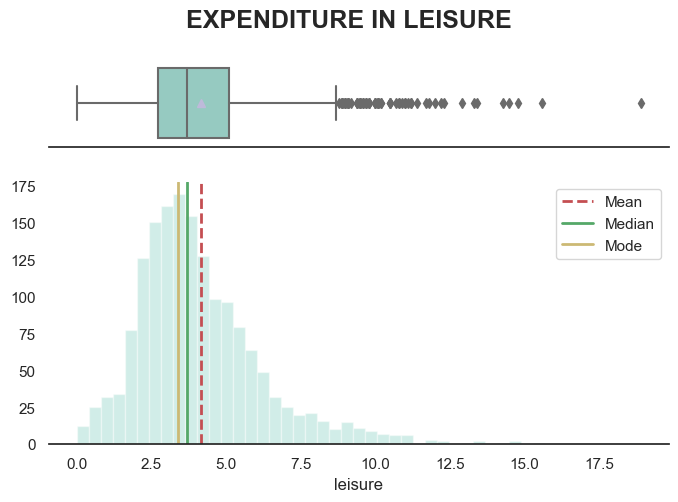

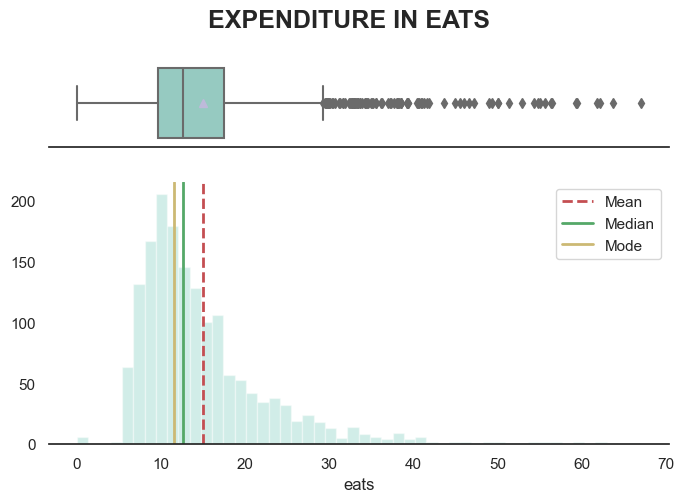

In [44]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set3", 8))
    fig.suptitle("EXPENDITURE IN "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True)
    sns.set_palette(sns.color_palette("Set3", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})



list_numerical_cols = numerical_cols.columns.to_list()

for utility in range(len(list_numerical_cols)):
    dist_box(numerical_cols[list_numerical_cols[utility]])

In [45]:
# drop unique identifier

phl = phl.drop(['PCODE'], axis=1)

phl.head()

Region      Province Municipality_City  food  clothing  power  \
0    NCR  1st district             Tondo   3.1       0.6   20.4   
1    NCR  1st district           Binondo   1.5       0.6   41.9   
2    NCR  1st district            Quiapo   2.1       0.6   28.1   
3    NCR  1st district       San Nicolas   3.0       1.6   53.6   
4    NCR  1st district        Santa Cruz   1.5       0.3   19.5   

   entertainment  house_items  Health  Transport  Education  Communication  \
0            2.1          4.2     2.9        0.8       27.5            4.1   
1            0.5          2.5     1.0        0.7       68.0            1.8   
2            1.1          3.1     2.1        0.9       42.4            5.3   
3            0.4          5.5     2.4        1.4       57.0            4.9   
4            1.0          2.0     1.7        0.5       32.5            4.3   

   leisure  eats  poverty  
0      0.5  12.6      0.0  
1      0.3  18.1      0.0  
2      0.4   7.9      0.0  
3      0.5   9.6      0.0  
4      0.6  14.3      0.0

In [46]:
# convert object dtype to category dtype 

for column in phl.columns:
    if phl[column].dtype == 'object':
        phl[column] = phl[column].astype('category')

In [47]:
phl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 0 to 1646
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Region             1645 non-null   category
 1   Province           1645 non-null   category
 2   Municipality_City  1645 non-null   category
 3   food               1645 non-null   float64 
 4   clothing           1645 non-null   float64 
 5   power              1645 non-null   float64 
 6   entertainment      1645 non-null   float64 
 7   house_items        1645 non-null   float64 
 8   Health             1645 non-null   float64 
 9   Transport          1645 non-null   float64 
 10  Education          1645 non-null   float64 
 11  Communication      1645 non-null   float64 
 12  leisure            1645 non-null   float64 
 13  eats               1645 non-null   float64 
 14  poverty            1645 non-null   float64 
dtypes: category(3), float64(12)
memory usage: 220.4 KB


In [48]:
phl.Region.nunique()

17

In [49]:
phl.Province.nunique()

85

In [50]:
phl.Municipality_City.nunique()

1430

In [51]:
# category enoding
# Encoding without using the target variable

phl_a = phl

# Encoding with relation to target

phl_b = phl

## TRAIN_TEST_SPLIT THE DATA

In [52]:
# Pre-requisite: train test split to avoid data leakage

X_a = phl.iloc[:, 0:-1]
y_a = phl.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a,y_a, test_size=0.3, random_state=42)

X_a_train.shape, X_a_test.shape, y_a_train.shape, y_a_test.shape

((1151, 14), (494, 14), (1151,), (494,))

## Encoding


##### Nominal Variables

##### a) Encoding Without Target

In [53]:
# Nominal variables: Region, Province, Municipality_City

# use OneHotEncoder : kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')

nominal = onehot.fit_transform(X_a_train[['Region', 'Province', 'Municipality_City']])

phl_nominal = pd.DataFrame(index=X_a_train.index, data=nominal, columns=onehot.get_feature_names(['Region', 'Province', 'Municipality_City']))

# for train set

X_a_train = pd.concat([X_a_train, phl_nominal], axis=1)

X_a_train.drop(columns=['Region', 'Province', 'Municipality_City'], inplace=True)

X_a_train.shape

(1151, 1132)

In [54]:
# for test variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')

nominal_test = onehot.fit_transform(X_a_test[['Region', 'Province', 'Municipality_City']])

phl_nominal_test = pd.DataFrame(index=X_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['Region', 'Province', 'Municipality_City']))

X_a_test = pd.concat([X_a_test, phl_nominal_test], axis=1)

X_a_test.drop(columns=['Region', 'Province', 'Municipality_City'], inplace=True)

X_a_test.shape

(494, 576)

In [55]:
X_a_train.head()

food  clothing  power  entertainment  house_items  Health  Transport  \
1241  49.5       4.5    9.0           42.1         56.8    40.9        7.4   
522    2.7       1.0   35.5            1.1          4.3     1.6        0.8   
1305  79.7       4.7    5.9           72.0         87.4    67.9        4.1   
31    66.0       7.6   11.5           53.5         78.4    50.6        9.5   
1035  43.0       3.2    7.5           37.8         48.3    39.5        3.6   

      Education  Communication  leisure  ...  Municipality_City_Villanueva  \
1241       18.1           24.4      5.5  ...                           0.0   
522        46.0            2.6      1.1  ...                           0.0   
1305        6.1           51.9      4.5  ...                           0.0   
31         18.9           76.0      9.2  ...                           0.0   
1035        9.1           53.0      4.4  ...                           0.0   

      Municipality_City_Villasis  Municipality_City_Villaverde  \
1241                         0.0                           0.0   
522                          0.0                           0.0   
1305                         0.0                           0.0   
31                           0.0                           0.0   
1035                         0.0                           0.0   

      Municipality_City_Vintar  Municipality_City_Vinzons  \
1241                       0.0                        0.0   
522                        0.0                        0.0   
1305                       0.0                        0.0   
31                         0.0                        0.0   
1035                       0.0                        0.0   

      Municipality_City_Virac  Municipality_City_Wao  \
1241                      0.0                    0.0   
522                       0.0                    0.0   
1305                      0.0                    0.0   
31                        0.0                    0.0   
1035                      0.0                    0.0   

      Municipality_City_Zamboanguita  Municipality_City_Zaragoza  \
1241                             0.0                         0.0   
522                              0.0                         0.0   
1305                             0.0                         0.0   
31                               0.0                         0.0   
1035                             0.0                         0.0   

      Municipality_City_Zarraga  
1241                        0.0  
522                         0.0  
1305                        0.0  
31                          0.0  
1035                        0.0  

[5 rows x 1132 columns]

##### Continuous Variables

(array([ 37., 536., 339., 132.,  53.,  28.,  10.,   6.,   6.,   4.]),
 array([ 0.  ,  6.37, 12.74, 19.11, 25.48, 31.85, 38.22, 44.59, 50.96,
        57.33, 63.7 ]),
 <BarContainer object of 10 artists>)

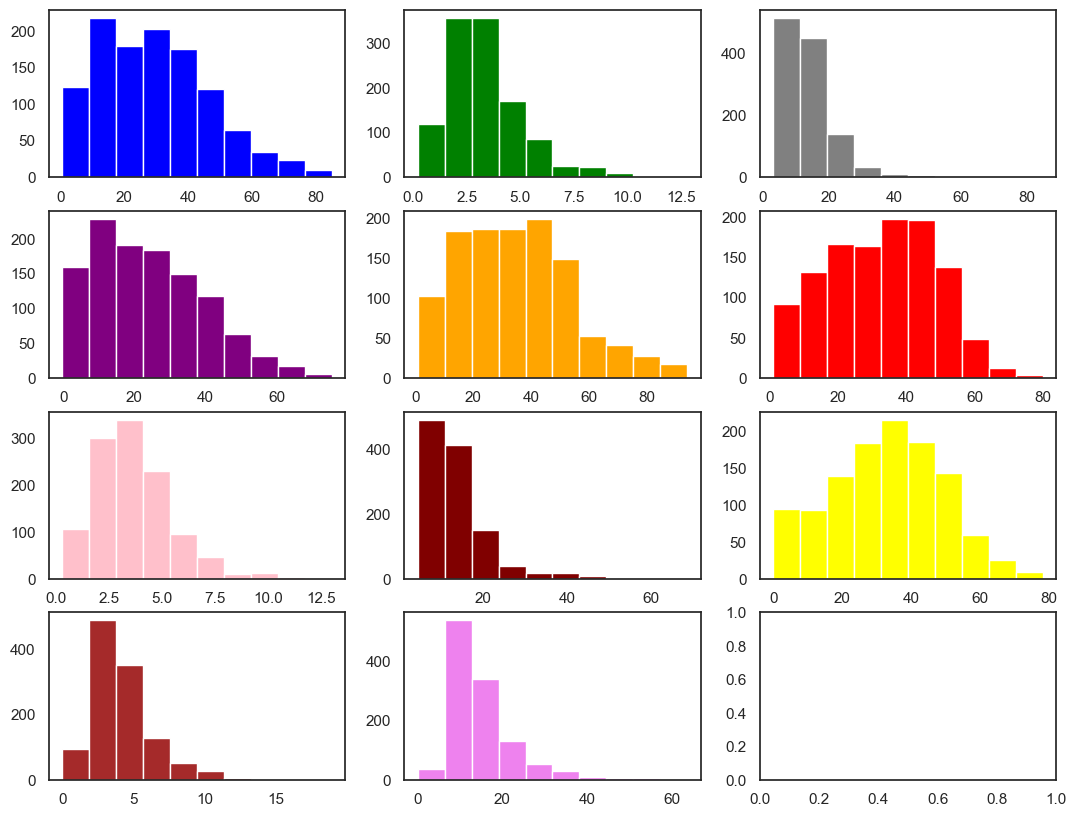

In [56]:
# Continuous Variables: food, clothing, power, entertainment, house_items, Health, Transport,Education, Communication,
#                                                                      leisure, eats


# Vizualisation


fig, ax = plt.subplots(4,3, figsize=(13,10))

ax[0][0].hist(X_a_train.food, color='blue', edgecolor='white')
ax[0][1].hist(X_a_train.clothing, color='green', edgecolor='white')
ax[0][2].hist(X_a_train.power, color='grey', edgecolor='white')
ax[1][0].hist(X_a_train.entertainment, color='purple', edgecolor='white')
ax[1][1].hist(X_a_train.house_items, color='orange', edgecolor='white')
ax[1][2].hist(X_a_train.Health, color='red', edgecolor='white')
ax[2][0].hist(X_a_train.Transport, color='pink', edgecolor='white')
ax[2][1].hist(X_a_train.Education, color='maroon', edgecolor='white')
ax[2][2].hist(X_a_train.Communication, color='yellow', edgecolor='white')
ax[3][0].hist(X_a_train.leisure, color='brown', edgecolor='white')
ax[3][1].hist(X_a_train.eats, color='violet', edgecolor='white')

#### Binning the continuous variables

In [57]:
# In Continuous Variables we have to use adaptive binning (quantiles)

# for X_a_train set

X_a_train['food_binned'] = pd.qcut(X_a_train.food, q=[0, .25, .50, .75, 1])
X_a_train['clothing_binned'] = pd.qcut(X_a_train.clothing, q=[0, .25, .50, .75, 1])
X_a_train['power_binned'] = pd.qcut(X_a_train.power, q=[0, .25, .50, .75, 1])
X_a_train['entertainment_binned'] = pd.qcut(X_a_train.entertainment, q=[0, .25, .50, .75, 1])
X_a_train['house_items_binned'] = pd.qcut(X_a_train.house_items, q=[0, .25, .50, .75, 1])
X_a_train['Health_binned'] = pd.qcut(X_a_train.Health, q=[0, .25, .50, .75, 1])
X_a_train['Transport_binned'] = pd.qcut(X_a_train.Transport, q=[0, .25, .50, .75, 1])
X_a_train['Education_binned'] = pd.qcut(X_a_train.Education, q=[0, .25, .50, .75, 1])
X_a_train['Communication_binned'] = pd.qcut(X_a_train.Communication, q=[0, .25, .50, .75, 1])
X_a_train['leisure_binned'] = pd.qcut(X_a_train.leisure, q=[0, .25, .50, .75, 1])
X_a_train['eats_binned'] = pd.qcut(X_a_train.eats, q=[0, .25, .50, .75, 1])


# we drop the previous features

X_a_train.drop(columns=['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats'], inplace=True)

# Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_a_train['food'] = le.fit_transform(X_a_train['food_binned'])
X_a_train['clothing'] = le.fit_transform(X_a_train['clothing_binned'])
X_a_train['power'] = le.fit_transform(X_a_train['power_binned'])
X_a_train['entertainment'] = le.fit_transform(X_a_train['entertainment_binned'])
X_a_train['house_items'] = le.fit_transform(X_a_train['house_items_binned'])
X_a_train['Health'] = le.fit_transform(X_a_train['Health_binned'])
X_a_train['Transport'] = le.fit_transform(X_a_train['Transport_binned'])
X_a_train['Education'] = le.fit_transform(X_a_train['Education_binned'])
X_a_train['Communication'] = le.fit_transform(X_a_train['Communication_binned'])
X_a_train['leisure'] = le.fit_transform(X_a_train['leisure_binned'])
X_a_train['eats'] = le.fit_transform(X_a_train['eats_binned'])


# we drop the binned features

X_a_train.drop(columns=['food_binned', 'clothing_binned',
       'power_binned', 'entertainment_binned', 'house_items_binned', 'Health_binned', 'Transport_binned',
       'Education_binned', 'Communication_binned', 'leisure_binned', 'eats_binned'], inplace=True)

X_a_train.head()


Region_CAR  Region_Caraga  Region_NCR  Region_Region I  \
1241         0.0            0.0         0.0              0.0   
522          0.0            0.0         0.0              0.0   
1305         0.0            0.0         0.0              0.0   
31           1.0            0.0         0.0              0.0   
1035         0.0            0.0         0.0              0.0   

      Region_Region II  Region_Region III  Region_Region IV-A  \
1241               0.0                0.0                 0.0   
522                0.0                0.0                 1.0   
1305               0.0                0.0                 0.0   
31                 0.0                0.0                 0.0   
1035               0.0                0.0                 0.0   

      Region_Region IV-B  Region_Region IX  Region_Region V  ...  clothing  \
1241                 0.0               1.0              0.0  ...         3   
522                  0.0               0.0              0.0  ...         0   
1305                 0.0               0.0              0.0  ...         3   
31                   0.0               0.0              0.0  ...         3   
1035                 0.0               0.0              0.0  ...         2   

      power  entertainment  house_items  Health  Transport  Education  \
1241      1              3            3       2          3          3   
522       3              0            0       0          0          3   
1305      0              3            3       3          2          0   
31        1              3            3       3          3          3   
1035      0              3            3       2          2          1   

      Communication  leisure  eats  
1241              1        3     3  
522               0        0     3  
1305              3        2     0  
31                3        3     3  
1035              3        2     0  

[5 rows x 1132 columns]

In [58]:
# In Continuous Variables we have to use adaptive binning (quantiles)

# for X_a_test set

X_a_test['food_binned'] = pd.qcut(X_a_test.food, q=[0, .25, .50, .75, 1])
X_a_test['clothing_binned'] = pd.qcut(X_a_test.clothing, q=[0, .25, .50, .75, 1])
X_a_test['power_binned'] = pd.qcut(X_a_test.power, q=[0, .25, .50, .75, 1])
X_a_test['entertainment_binned'] = pd.qcut(X_a_test.entertainment, q=[0, .25, .50, .75, 1])
X_a_test['house_items_binned'] = pd.qcut(X_a_test.house_items, q=[0, .25, .50, .75, 1])
X_a_test['Health_binned'] = pd.qcut(X_a_test.Health, q=[0, .25, .50, .75, 1])
X_a_test['Transport_binned'] = pd.qcut(X_a_test.Transport, q=[0, .25, .50, .75, 1])
X_a_test['Education_binned'] = pd.qcut(X_a_test.Education, q=[0, .25, .50, .75, 1])
X_a_test['Communication_binned'] = pd.qcut(X_a_test.Communication, q=[0, .25, .50, .75, 1])
X_a_test['leisure_binned'] = pd.qcut(X_a_test.leisure, q=[0, .25, .50, .75, 1])
X_a_test['eats_binned'] = pd.qcut(X_a_test.eats, q=[0, .25, .50, .75, 1])


# we drop the previous features

X_a_test.drop(columns=['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats'], inplace=True)

# Since each category is divided into 5 equal bins, we can apply Label Encoder without bias


le = LabelEncoder()

X_a_test['food'] = le.fit_transform(X_a_test['food_binned'])
X_a_test['clothing'] = le.fit_transform(X_a_test['clothing_binned'])
X_a_test['power'] = le.fit_transform(X_a_test['power_binned'])
X_a_test['entertainment'] = le.fit_transform(X_a_test['entertainment_binned'])
X_a_test['house_items'] = le.fit_transform(X_a_test['house_items_binned'])
X_a_test['Health'] = le.fit_transform(X_a_test['Health_binned'])
X_a_test['Transport'] = le.fit_transform(X_a_test['Transport_binned'])
X_a_test['Education'] = le.fit_transform(X_a_test['Education_binned'])
X_a_test['Communication'] = le.fit_transform(X_a_test['Communication_binned'])
X_a_test['leisure'] = le.fit_transform(X_a_test['leisure_binned'])
X_a_test['eats'] = le.fit_transform(X_a_test['eats_binned'])


# we drop the binned features

X_a_test.drop(columns=['food_binned', 'clothing_binned',
       'power_binned', 'entertainment_binned', 'house_items_binned', 'Health_binned', 'Transport_binned',
       'Education_binned', 'Communication_binned', 'leisure_binned', 'eats_binned'], inplace=True)

X_a_test.head()


Region_CAR  Region_Caraga  Region_NCR  Region_Region I  \
680          0.0            0.0         0.0              0.0   
1569         0.0            0.0         0.0              0.0   
725          0.0            0.0         0.0              0.0   
1144         0.0            0.0         0.0              0.0   
1275         0.0            0.0         0.0              0.0   

      Region_Region II  Region_Region III  Region_Region IV-A  \
680                0.0                0.0                 0.0   
1569               0.0                0.0                 0.0   
725                0.0                0.0                 0.0   
1144               0.0                0.0                 0.0   
1275               0.0                0.0                 0.0   

      Region_Region IV-B  Region_Region IX  Region_Region V  ...  clothing  \
680                  0.0               0.0              1.0  ...         0   
1569                 0.0               0.0              0.0  ...         3   
725                  0.0               0.0              1.0  ...         2   
1144                 0.0               0.0              0.0  ...         2   
1275                 0.0               0.0              0.0  ...         1   

      power  entertainment  house_items  Health  Transport  Education  \
680       0              2            2       2          0          0   
1569      2              1            2       2          3          3   
725       0              3            3       3          3          1   
1144      0              3            3       3          1          0   
1275      0              2            2       2          1          0   

      Communication  leisure  eats  
680               3        1     0  
1569              3        3     3  
725               3        2     0  
1144              3        1     0  
1275              1        1     0  

[5 rows x 576 columns]

#### b) Enconding With Target

In [59]:
# Encoding WITH target ( using phl_b)

# prerequisite: train test split to avoid data leakage

X_b = phl_b.iloc[:, 0:-1]
y_b = phl_b.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.3, random_state=42)

X_b_train.shape, X_b_test.shape, y_b_train.shape, y_b_test.shape

((1151, 14), (494, 14), (1151,), (494,))

In [60]:
# using Target Encoder

y_b_train = pd.to_numeric(y_b_train)
y_b_test = pd.to_numeric(y_b_test)

from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(X_b_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col
    
phl_te_train = target_encoder(X_b_train, y_b_train)    
phl_te_train.head(10)
    

Region  Province  Municipality_City  food  clothing  power  \
1241     0.0       0.0                0.0   0.0       0.0    0.0   
522      0.0       0.0                0.0   0.0       0.0    0.0   
1305     0.0       0.0                0.0   0.0       0.0    0.0   
31       0.0       0.0                0.0   0.0       0.0    0.0   
1035     0.0       0.0                0.0   0.0       0.0    0.0   
210      1.0       1.0                1.0   1.0       1.0    1.0   
439      0.0       0.0                0.0   0.0       0.0    0.0   
637      0.0       0.0                0.0   0.0       0.0    0.0   
693      0.0       0.0                0.0   0.0       0.0    0.0   
214      1.0       1.0                1.0   1.0       1.0    1.0   

      entertainment  house_items  Health  Transport  Education  Communication  \
1241            0.0          0.0     0.0        0.0        0.0            0.0   
522             0.0          0.0     0.0        0.0        0.0            0.0   
1305            0.0          0.0     0.0        0.0        0.0            0.0   
31              0.0          0.0     0.0        0.0        0.0            0.0   
1035            0.0          0.0     0.0        0.0        0.0            0.0   
210             1.0          1.0     1.0        1.0        1.0            1.0   
439             0.0          0.0     0.0        0.0        0.0            0.0   
637             0.0          0.0     0.0        0.0        0.0            0.0   
693             0.0          0.0     0.0        0.0        0.0            0.0   
214             1.0          1.0     1.0        1.0        1.0            1.0   

      leisure  eats  
1241      0.0   0.0  
522       0.0   0.0  
1305      0.0   0.0  
31        0.0   0.0  
1035      0.0   0.0  
210       1.0   1.0  
439       0.0   0.0  
637       0.0   0.0  
693       0.0   0.0  
214       1.0   1.0

### Data Standardization (Scaling)

In [61]:
# Feature Scaling (Data Standardization/Normalization)

# using phl_a (encoded without target)

# Standard Scaling

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()

X_a_train_ss = pd.DataFrame(ss.fit_transform(X_a_train), columns=X_a_train.columns)

X_a_train_ss.head()

Region_CAR  Region_Caraga  Region_NCR  Region_Region I  Region_Region II  \
0   -0.221867      -0.215322   -0.152023        -0.296482         -0.234511   
1   -0.221867      -0.215322   -0.152023        -0.296482         -0.234511   
2   -0.221867      -0.215322   -0.152023        -0.296482         -0.234511   
3    4.507196      -0.215322   -0.152023        -0.296482         -0.234511   
4   -0.221867      -0.215322   -0.152023        -0.296482         -0.234511   

   Region_Region III  Region_Region IV-A  Region_Region IV-B  \
0           -0.28058           -0.303365           -0.219703   
1           -0.28058            3.296359           -0.219703   
2           -0.28058           -0.303365           -0.219703   
3           -0.28058           -0.303365           -0.219703   
4           -0.28058           -0.303365           -0.219703   

   Region_Region IX  Region_Region V  ...  clothing     power  entertainment  \
0          4.597240        -0.278775  ...  1.355408 -0.430889       1.344526   
1         -0.217522        -0.278775  ... -1.291778  1.356330      -1.335987   
2         -0.217522        -0.278775  ...  1.355408 -1.324498       1.344526   
3         -0.217522        -0.278775  ...  1.355408 -0.430889       1.344526   
4         -0.217522        -0.278775  ...  0.473013 -1.324498       1.344526   

   house_items    Health  Transport  Education  Communication   leisure  \
0     1.345460  0.454303   1.383776   1.345614      -0.442630  1.353618   
1    -1.336914 -1.336459  -1.328017   1.345614      -1.338002 -1.332614   
2     1.345460  1.349683   0.479845  -1.338617       1.348115  0.458207   
3     1.345460  1.349683   1.383776   1.345614       1.348115  1.353618   
4     1.345460  0.454303   0.479845  -0.443874       1.348115  0.458207   

       eats  
0  1.352524  
1  1.352524  
2 -1.329995  
3  1.352524  
4 -1.329995  

[5 rows x 1132 columns]

In [62]:
# RobustScaler

rs = RobustScaler()

X_a_train_rs = pd.DataFrame(rs.fit_transform(X_a_train), columns=X_a_train.columns)

X_a_train_rs.head()

Region_CAR  Region_Caraga  Region_NCR  Region_Region I  Region_Region II  \
0         0.0            0.0         0.0              0.0               0.0   
1         0.0            0.0         0.0              0.0               0.0   
2         0.0            0.0         0.0              0.0               0.0   
3         1.0            0.0         0.0              0.0               0.0   
4         0.0            0.0         0.0              0.0               0.0   

   Region_Region III  Region_Region IV-A  Region_Region IV-B  \
0                0.0                 0.0                 0.0   
1                0.0                 1.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   Region_Region IX  Region_Region V  ...  clothing  power  entertainment  \
0               1.0              0.0  ...       1.0    0.0            1.0   
1               0.0              0.0  ...      -0.5    1.0           -0.5   
2               0.0              0.0  ...       1.0   -0.5            1.0   
3               0.0              0.0  ...       1.0    0.0            1.0   
4               0.0              0.0  ...       0.5   -0.5            1.0   

   house_items  Health  Transport  Education  Communication  leisure  eats  
0          1.0     0.5        1.0   1.333333            0.0      1.0   1.0  
1         -0.5    -0.5       -0.5   1.333333           -0.5     -0.5   1.0  
2          1.0     1.0        0.5  -0.666667            1.0      0.5  -0.5  
3          1.0     1.0        1.0   1.333333            1.0      1.0   1.0  
4          1.0     0.5        0.5   0.000000            1.0      0.5  -0.5  

[5 rows x 1132 columns]

In [63]:
# MinMaxScaler

mm = MinMaxScaler()

X_a_train_mm = pd.DataFrame(mm.fit_transform(X_a_train), columns=X_a_train.columns)

X_a_train_mm.head()

Region_CAR  Region_Caraga  Region_NCR  Region_Region I  Region_Region II  \
0         0.0            0.0         0.0              0.0               0.0   
1         0.0            0.0         0.0              0.0               0.0   
2         0.0            0.0         0.0              0.0               0.0   
3         1.0            0.0         0.0              0.0               0.0   
4         0.0            0.0         0.0              0.0               0.0   

   Region_Region III  Region_Region IV-A  Region_Region IV-B  \
0                0.0                 0.0                 0.0   
1                0.0                 1.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   Region_Region IX  Region_Region V  ...  clothing     power  entertainment  \
0               1.0              0.0  ...  1.000000  0.333333            1.0   
1               0.0              0.0  ...  0.000000  1.000000            0.0   
2               0.0              0.0  ...  1.000000  0.000000            1.0   
3               0.0              0.0  ...  1.000000  0.333333            1.0   
4               0.0              0.0  ...  0.666667  0.000000            1.0   

   house_items    Health  Transport  Education  Communication   leisure  eats  
0          1.0  0.666667   1.000000   1.000000       0.333333  1.000000   1.0  
1          0.0  0.000000   0.000000   1.000000       0.000000  0.000000   1.0  
2          1.0  1.000000   0.666667   0.000000       1.000000  0.666667   0.0  
3          1.0  1.000000   1.000000   1.000000       1.000000  1.000000   1.0  
4          1.0  0.666667   0.666667   0.333333       1.000000  0.666667   0.0  

[5 rows x 1132 columns]

In [64]:
#Standard Scaler shrinks data to mean=0 and std =1 with the presence of outlier affecting the balanced scale
#MinMaxScaler compress data to a range of [0,1] which is limited to modeling
#Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers

# for RobustScaler

#Apply to x_test set

X_a_test_rs = pd.DataFrame(rs.fit_transform(X_a_test), columns=X_a_test.columns)

### Oversampling and Undersampling

In [65]:
# Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

# for phl_a set

a_poverty_0 = phl_a[phl_a.poverty == 0].poverty.count()/phl_a.poverty.count()
a_poverty_1 = phl_a[phl_a.poverty == 1].poverty.count()/phl_a.poverty.count()


print(f'Lower class : ' + str(round((a_poverty_0)*100))+'%')
print(f'Upper class : ' +str(round((a_poverty_1)*100))+'%')

Lower class : 92%
Upper class : 8%


<h1 style="font-size:1.5rem;color:blue;"> Oversampling</h1>

In [66]:
# Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_a_train_rs_over, y_a_train_over = oversample.fit_resample(X_a_train_rs, y_a_train)
print(Counter(y_a_train_over))

Counter({0.0: 1058, 1.0: 1058})


In [67]:
# apply for X_test

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_a_test_rs_over, y_a_test_over = oversample.fit_resample(X_a_test_rs, y_a_test)
print(Counter(y_a_test_over))

Counter({0.0: 462, 1.0: 462})


<h1 style="font-size:1.5rem;color:blue;"> Undersampling</h1>

In [68]:
# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

X_a_train_rs_under, y_a_train_under = undersample.fit_resample(X_a_train_rs, y_a_train)
print(Counter(y_a_train_under))

Counter({0.0: 93, 1.0: 93})


<h1 style="font-size:1.5rem;color:purple;"> We use Oversamping</h1>

In [69]:
#Random Undersampling randomly select data from the majority class to delete from the dataset
#which might result in information loss during modeling

#SMOTE (Oversampling) duplicates data from the minority class which helps balance the distribution but does not
#provide any additional information to the model

# for train set

print("Train set: ")

X_a_train_rs_over, y_a_train_over = oversample.fit_resample(X_a_train_rs, y_a_train)
print(Counter(y_a_train_over))


# we apply for test set

print("")
print("Test set")

X_a_test_rs_over, y_a_test_over = oversample.fit_resample(X_a_test_rs, y_a_test)
print(Counter(y_a_test_over))


Train set: 
Counter({0.0: 1058, 1.0: 1058})

Test set
Counter({0.0: 462, 1.0: 462})


In [70]:
pd.set_option('display.max_columns', None)
X_a_train_rs_over.head(10)

Region_CAR  Region_Caraga  Region_NCR  Region_Region I  Region_Region II  \
0         0.0            0.0         0.0              0.0               0.0   
1         0.0            0.0         0.0              0.0               0.0   
2         0.0            0.0         0.0              0.0               0.0   
3         1.0            0.0         0.0              0.0               0.0   
4         0.0            0.0         0.0              0.0               0.0   
5         0.0            0.0         0.0              1.0               0.0   
6         0.0            0.0         0.0              0.0               0.0   
7         0.0            0.0         0.0              0.0               0.0   
8         0.0            0.0         0.0              0.0               0.0   
9         0.0            0.0         0.0              1.0               0.0   

   Region_Region III  Region_Region IV-A  Region_Region IV-B  \
0                0.0                 0.0                 0.0   
1                0.0                 1.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   
5                0.0                 0.0                 0.0   
6                1.0                 0.0                 0.0   
7                0.0                 0.0                 1.0   
8                0.0                 0.0                 0.0   
9                0.0                 0.0                 0.0   

   Region_Region IX  Region_Region V  Region_Region VI  Region_Region VII  \
0               1.0              0.0               0.0                0.0   
1               0.0              0.0               0.0                0.0   
2               0.0              0.0               0.0                0.0   
3               0.0              0.0               0.0                0.0   
4               0.0              0.0               0.0                1.0   
5               0.0              0.0               0.0                0.0   
6               0.0              0.0               0.0                0.0   
7               0.0              0.0               0.0                0.0   
8               0.0              1.0               0.0                0.0   
9               0.0              0.0               0.0                0.0   

   Region_Region VIII  Region_Region X  Region_Region XI  Region_Region XII  \
0                 0.0              0.0               0.0                0.0   
1                 0.0              0.0               0.0                0.0   
2                 0.0              1.0               0.0                0.0   
3                 0.0              0.0               0.0                0.0   
4                 0.0              0.0               0.0                0.0   
5                 0.0              0.0               0.0                0.0   
6                 0.0              0.0               0.0                0.0   
7                 0.0              0.0               0.0                0.0   
8                 0.0              0.0               0.0                0.0   
9                 0.0              0.0               0.0                0.0   

   Province_2nd district  Province_3rd district  Province_4th district  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   
5                    0.0                    0.0                    0.0   
6                    0.0                    0.0                    0.0   
7                    0.0                    0.0                    0.0   
8                    0.0                    

## Feature Selection

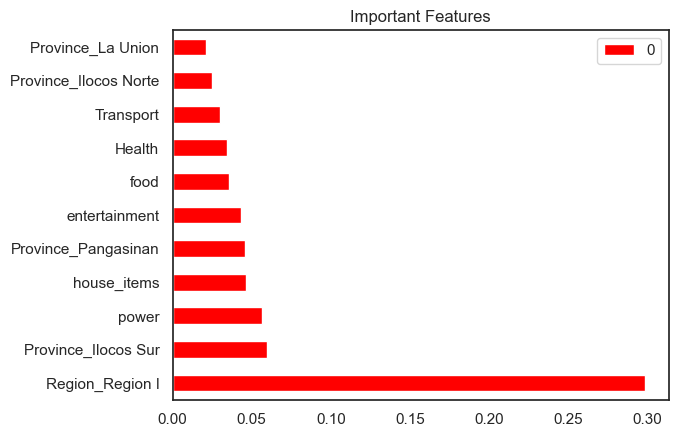

In [71]:

# we get the important features 

from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier(random_state=42)
fi_a = fi.fit(X_a_train_rs_over, y_a_train_over)

phl_fi_a = pd.DataFrame(fi_a.feature_importances_, index=X_a_train_rs_over.columns)
phl_fi_a.nlargest(11, phl_fi_a.columns).plot(kind='barh', color='red', title='Important Features')
plt.show()



### Principal Component Analysis

In [72]:
# Apply PCA on X_train set
pca = PCA(.85)

pca_a_train = pca.fit(X_a_train_rs_over, y_a_train_over)
print(pca_a_train.n_components_)

X_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(X_a_train_rs_over))
X_a_train_rs_over_pca.head()

64


0         1         2         3         4         5         6   \
0  2.314262  1.503986  0.334657 -0.152022 -0.316910 -0.174415  0.287294   
1 -1.433040  1.144497  1.112610  0.427931 -0.243423 -0.103781 -0.098482   
2  2.686606 -1.140068 -0.164350 -0.240521 -0.092613  0.075818  0.144479   
3  2.738951  1.348989 -0.041270  0.164661 -0.146695 -0.246782  0.258548   
4  2.365852 -0.722055  0.275794 -0.171374  0.350299 -0.170777  0.002961   

         7         8         9         10        11        12        13  \
0 -0.647081  0.243647 -0.230757 -0.128845 -0.069311 -0.488560  0.173945   
1  0.443378 -0.447021 -0.242247 -0.328823  0.436419 -0.175236  0.366751   
2  0.203093 -0.220107 -0.019780  0.251451 -0.157455  0.214267 -0.347595   
3 -0.214329  0.159587 -0.094127 -0.413486  0.420981  0.038954 -0.298138   
4  0.428119  0.324204  0.068034 -0.574799 -0.481095 -0.310190 -0.202089   

         14        15        16        17        18        19        20  \
0 -0.364926  0.140469 -0.094304 -0.074278 -0.260386 -0.272305 -0.561150   
1 -0.160846  0.068096 -0.026534 -0.052267 -0.182943  0.100589  0.146820   
2 -0.560802  0.426149 -0.139786 -0.559069  0.073061 -0.020568  0.366987   
3  0.089965 -0.282961  0.256262 -0.094939 -0.058295 -0.310916  0.095939   
4 -0.076079 -0.246681 -0.108796 -0.005033  0.176576 -0.000628  0.106099   

         21        22        23        24        25        26        27  \
0 -0.083755 -0.300052 -0.358561  0.027293 -0.233223  0.074054 -0.078993   
1 -0.023599  0.013561  0.033277  0.037445  0.000890  0.015059  0.150702   
2  0.080867  0.085605 -0.133968  0.042540 -0.066692  0.030506 -0.041564   
3  0.462380  0.882859 -0.111938  0.024911  0.044771 -0.045091 -0.092342   
4  0.060817 -0.090128 -0.060582 -0.061055 -0.074511  0.093737  0.121706   

         28        29        30        31        32        33        34  \
0 -0.199524 -0.048693 -0.050532  0.008386  0.110784 -0.033685  0.090208   
1 -0.136711  0.001421 -0.007698  0.039091  0.004697 -0.178752 -0.439443   
2 -0.040197 -0.005508 -0.025986 -0.059219  0.097438  0.100460  0.004233   
3 -0.118551 -0.017138 -0.007301 -0.031200  0.101442  0.016284  0.052426   
4 -0.059093  0.012127 -0.080588 -0.096379  0.135123  0.230992 -0.015437   

         35        36        37        38        39        40        41  \
0 -0.052372 -0.104580 -0.101534 -0.180170  0.502257  0.240947 -0.046189   
1  0.246437  0.475682  0.021754 -0.189543  0.064498 -0.198173 -0.109886   
2  0.039032  0.032344 -0.057747 -0.181004 -0.021798 -0.242403  0.457096   
3  0.022134 -0.001605 -0.003307 -0.098811  0.063074 -0.047416 -0.027270   
4  0.021822  0.035932  0.954042  0.040471  0.117733  0.030320  0.000676   

         42        43        44        45        46        47        48  \
0 -0.082097  0.251603  0.001211 -0.090101 -0.036531 -0.006276  0.004171   
1 -0.357406  0.012748 -0.031964 -0.054326  0.034285 -0.018632  0.022542   
2  0.085397  0.161153  0.220551 -0.137052 -0.032507 -0.165880  0.318353   
3  0.029213 -0.048519 -0.028206  0.011314 -0.019387 -0.005084 -0.109472   
4  0.049078 -0.000950  0.011335 -0.030622 -0.010784 -0.022885 -0.060028   

         49        50        51        52        53        54        55  \
0 -0.013347  0.038050  0.007646 -0.083574  0.047420 -0.254097  0.048627   
1  0.005660  0.002924  0.005733 -0.026833  0.017060  0.002019  0.000356   
2 -0.314469  0.024529 -0.005433 -0.007042  0.025817  0.045069  0.002060   
3  0.041621  0.064449 -0.033559  0.044185  0.448824  0.087437 -0.371335   
4 -0.056885  0.028163 -0.001118 -0.059149 -0.020969  0.031234  0.016094   

         56        57        58        59        60        61        62  \
0 -0.033943  0.029354  0.022221 -0.033326  0.006070 -0.005671 -0.003432   
1 -0.024600 -0.051851  0.000600  0.019562  0.030777 -0.003036  0.026820   
2  0.002341  0.014801  0.000515 -0.036457  0.005667 -0.037818 -0.015637   
3 -0.140607  0.136152 -0.010152 -0.014657 -0.016765 -0.022472 -0.009326   
4 -0.036512  0.024438  0.0

In [73]:
# Apply PCA on X_test set
pca = PCA(n_components = 64)

pca_a_test = pca.fit(X_a_test_rs_over, y_a_test_over)
print(pca_a_test.n_components_)

X_a_test_rs_over_pca = pd.DataFrame(pca_a_test.transform(X_a_test_rs_over))
X_a_test_rs_over_pca.head()

64


0         1         2         3         4         5         6   \
0  1.007842 -0.231838  1.742643 -0.216395  0.093225 -0.259612  0.272087   
1  1.649934  0.464520 -1.389182 -0.237235  0.245206  0.082008  0.131585   
2  2.557185 -0.261280  0.553410 -0.089567 -0.114120  0.373412 -0.016989   
3  2.088350 -0.577293  1.191634  0.312384 -0.293264 -0.043767 -0.449828   
4  1.155798 -0.161628  1.217580  0.065822 -0.064589 -0.146884  0.021674   

         7         8         9         10        11        12        13  \
0  0.092117  0.248133 -0.317536 -0.043679 -0.072172  0.650128 -0.288676   
1 -0.053473  0.095630 -0.062346 -0.143128 -0.019491 -0.049879  0.025630   
2 -0.157746  0.181797 -0.366024 -0.092821  0.031848  0.715967 -0.336907   
3  0.068373 -0.426747  0.093245 -0.276910 -0.153381 -0.316020  0.060926   
4  0.029795 -0.003866  0.075920  0.156198 -0.275657  0.106106 -0.265055   

         14        15        16        17        18        19        20  \
0 -0.573610 -0.079291 -0.233989 -0.075777 -0.046037  0.016941 -0.023203   
1 -0.244887  0.109414  0.015330  0.071932 -0.156980  0.117480 -0.157772   
2 -0.459382 -0.253852 -0.030394 -0.379479 -0.134529 -0.022402 -0.385735   
3 -0.317731  0.137113 -0.232164  0.224014 -0.204765  0.121687  0.080035   
4  0.688047  0.662503  0.038495 -0.459547 -0.026156 -0.238225  0.089404   

         21        22        23        24        25        26        27  \
0 -0.025452 -0.131944 -0.103030  0.091614  0.098388 -0.000256 -0.008353   
1  0.255695 -0.214541  0.001899  0.000518  0.116034  0.131362 -0.111046   
2 -0.080324  0.072210 -0.161625 -0.017392 -0.063341  0.087570  0.007104   
3  0.085298 -0.113160 -0.040736 -0.090878  0.017194  0.046449 -0.040349   
4 -0.149194 -0.026806  0.063621  0.025797 -0.133242 -0.034776  0.077758   

         28        29        30        31        32        33        34  \
0  0.068712 -0.019619 -0.025048 -0.049861 -0.027570 -0.010670  0.043960   
1  0.132182  0.150730  0.094112 -0.043764  0.037520 -0.071851 -0.019890   
2  0.012228  0.043452  0.042436 -0.050145  0.000591 -0.022910 -0.044485   
3  0.051973  0.014069  0.154290 -0.248771  0.067545  0.187183  0.145315   
4 -0.063956 -0.136511 -0.048758  0.015363 -0.031829  0.056814  0.065016   

         35        36        37        38        39        40        41  \
0  0.040255 -0.028430 -0.002541 -0.002912 -0.006626  0.011319  0.105619   
1 -0.032689  0.057331 -0.044169 -0.023285  0.039352 -0.012377 -0.068531   
2 -0.010080  0.021617  0.055153 -0.030142  0.001152 -0.021207 -0.149198   
3  0.053779 -0.098901 -0.051981  0.042406 -0.008937  0.047828  0.189688   
4  0.026814  0.056094  0.047591  0.028277 -0.024388 -0.007517  0.061468   

         42        43        44        45        46        47        48  \
0 -0.001799 -0.058948 -0.067138  0.019269  0.140575  0.220144 -0.047898   
1 -0.136550  0.013705  0.022775  0.192278 -0.053192 -0.006643  0.069663   
2 -0.064894  0.021204  0.116067  0.062162 -0.198948 -0.370140  0.099576   
3  0.026263 -0.012773 -0.091742  0.113137  0.146105  0.123672 -0.358008   
4 -0.050589 -0.110397  0.069290 -0.125730 -0.031735 -0.062730  0.064377   

         49        50        51        52        53        54        55  \
0 -0.193299 -0.188355 -0.131963  0.043847  0.001128  0.023739  0.049708   
1 -0.062703 -0.006841 -0.040053  0.059545  0.111780  0.013985  0.013735   
2  0.373842  0.253413  0.171622 -0.130782  0.049465 -0.021270 -0.117236   
3  0.073833  0.612143  0.010500  0.352468 -0.109777  0.019717 -0.005557   
4  0.200538 -0.047590 -0.090575  0.222379  0.188743 -0.111178  0.084000   

         56        57        58        59        60        61        62  \
0 -0.059289 -0.041058  0.025133 -0.057429  0.111287  0.031522 -0.007792   
1  0.072760  0.061935 -0.041876  0.078531  0.030206  0.176846  0.049137   
2  0.044689  0.000193 -0.073092  0.097982 -0.052852 -0.055645  0.002332   
3 -0.058283 -0.074937 -0.022172  0.005805  0.005534 -0.035443 -0.043584   
4  0.160572 -0.176936 -0.0

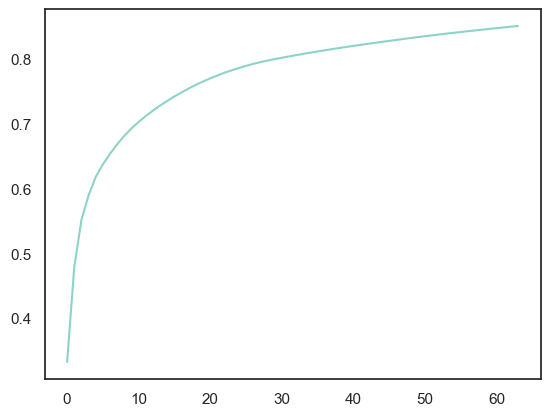

In [74]:
# Dimensionality Reduction (Component-based): PCA
phl_a_train_processed = pd.concat([X_a_train_rs_over_pca, y_a_train_over], axis=1)
phl_a_train_processed.shape


plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()


<h1 style="font-size:4.5rem;color:maroon;"> Algorithms</h1>

In [75]:
# testing models
# Models to be tested: Logistic regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, lightGBM

#Model Import

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [76]:
classifiers = {
    "LogisticsRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    
}

In [77]:
# Compute the training score of each model

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_a_train_rs_over_pca, y_a_train_over)
    train_score = round(classifier.score(X_a_train_rs_over_pca, y_a_train_over), 2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_a_test_rs_over_pca, y_a_test_over),2)
    test_scores.append(test_score)
    
print(train_scores)    
print(test_scores)

[1.0, 1.0, 1.0, 1.0, 1.0]
[0.79, 0.82, 0.78, 0.9, 0.77]


In [78]:
%%time

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_a_train_rs_over_pca, y_a_train_over)
    train_score = cross_val_score(classifier, X_a_train_rs_over_pca, y_a_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_a_test_rs_over_pca, y_a_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)    
print(test_cross_scores)

[1.0, 1.0, 1.0, 0.99, 1.0]
[1.0, 1.0, 1.0, 0.99, 1.0]
CPU times: total: 17.9 s
Wall time: 17.4 s


0.49783549783549785


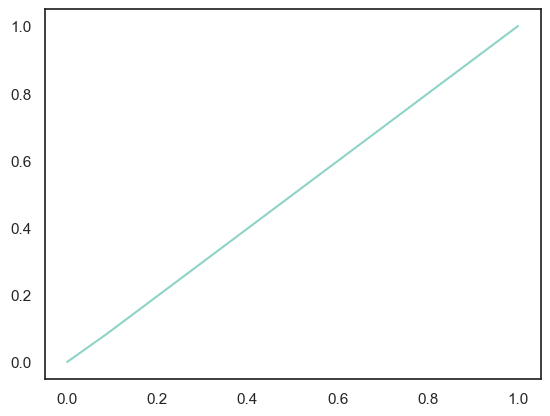

In [79]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


rf = RandomForestClassifier()
rf.fit(X_a_train_rs_over_pca, y_a_train_over)
rf_pred = cross_val_predict(rf, X_a_train_rs_over_pca, y_a_train_over, cv=5)
rf_pred
print(roc_auc_score(y_a_test_over, (pd.DataFrame(rf_pred)).iloc[:924,:]))

fpr, tpr, _ = roc_curve(y_a_test_over, (pd.DataFrame(rf_pred)).iloc[:924,:])
plt.plot(fpr, tpr)
plt.show()

In [80]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty":['l1', 'l2', 'elasticnet', 'none'], "C": [0.001, 0.01, 1, 10, 100, 1000],
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(X_a_train_rs_over_pca, y_a_train_over)
le_best = grid_logistic.best_estimator_

In [81]:
le_best

LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

<h1 style="font-size:5rem;color:Green;"> Deep Learning</h1>

In [82]:
# we will use the ready dataset

X_a = X_a.drop(["Region","Province",'Municipality_City'], axis=1)

X_a.head()

food  clothing  power  entertainment  house_items  Health  Transport  \
0   3.1       0.6   20.4            2.1          4.2     2.9        0.8   
1   1.5       0.6   41.9            0.5          2.5     1.0        0.7   
2   2.1       0.6   28.1            1.1          3.1     2.1        0.9   
3   3.0       1.6   53.6            0.4          5.5     2.4        1.4   
4   1.5       0.3   19.5            1.0          2.0     1.7        0.5   

   Education  Communication  leisure  eats  
0       27.5            4.1      0.5  12.6  
1       68.0            1.8      0.3  18.1  
2       42.4            5.3      0.4   7.9  
3       57.0            4.9      0.5   9.6  
4       32.5            4.3      0.6  14.3

In [83]:
X_a.shape

(1645, 11)

In [84]:
y = y_a

y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: poverty, dtype: float64

In [85]:
X = X_a

X.head()

food  clothing  power  entertainment  house_items  Health  Transport  \
0   3.1       0.6   20.4            2.1          4.2     2.9        0.8   
1   1.5       0.6   41.9            0.5          2.5     1.0        0.7   
2   2.1       0.6   28.1            1.1          3.1     2.1        0.9   
3   3.0       1.6   53.6            0.4          5.5     2.4        1.4   
4   1.5       0.3   19.5            1.0          2.0     1.7        0.5   

   Education  Communication  leisure  eats  
0       27.5            4.1      0.5  12.6  
1       68.0            1.8      0.3  18.1  
2       42.4            5.3      0.4   7.9  
3       57.0            4.9      0.5   9.6  
4       32.5            4.3      0.6  14.3

In [86]:
X.shape

(1645, 11)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1316, 11), (329, 11), (1316,), (329,))

In [88]:
X_train

array([[-0.86735594, -0.69920662,  0.08408037, ..., -0.83067218,
        -0.67659337, -0.1583143 ],
       [-1.11210265, -0.58539637,  1.04965613, ..., -1.36241571,
        -1.00680679,  0.35723777],
       [-1.65404181, -1.72349892,  2.22400503, ..., -1.86913601,
        -1.66723361,  0.54471125],
       ...,
       [-1.54332306, -1.43897328,  1.76731379, ..., -1.59388054,
        -1.10115348,  1.03682914],
       [-0.61678192, -0.75611175, -0.42480416, ...,  0.10769874,
        -0.20485993, -0.49810999],
       [-1.06548423, -0.98373226,  0.07103205, ..., -1.34364829,
        -0.53507334,  1.37662482]])

In [89]:
X_train.shape

(1316, 11)

In [90]:
X_train.shape[1]

11

<h1 style="font-size:3.5rem;color:orange;"> Use of Tensorflow & Keras</h1>

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [92]:
%%time
# neural network layers

model = Sequential()

model.add(Dense(100, activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CPU times: total: 312 ms
Wall time: 478 ms


In [93]:
%%time

model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/10
132/132 [==============================] - 3s 10ms/step - loss: 0.1810 - accuracy: 0.9400 - val_loss: 0.1444 - val_accuracy: 0.9331
Epoch 2/10
132/132 [==============================] - 1s 7ms/step - loss: 0.0999 - accuracy: 0.9597 - val_loss: 0.0829 - val_accuracy: 0.9757
Epoch 3/10
132/132 [==============================] - 1s 6ms/step - loss: 0.0693 - accuracy: 0.9734 - val_loss: 0.0467 - val_accuracy: 0.9818
Epoch 4/10
132/132 [==============================] - 1s 6ms/step - loss: 0.0568 - accuracy: 0.9749 - val_loss: 0.0626 - val_accuracy: 0.9696
Epoch 5/10
132/132 [==============================] - 1s 6ms/step - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.0498 - val_accuracy: 0.9787
Epoch 6/10
132/132 [==============================] - 1s 6ms/step - loss: 0.0498 - accuracy: 0.9795 - val_loss: 0.0720 - val_accuracy: 0.9757
Epoch 7/10
132/132 [==============================] - 1s 5ms/step - loss: 0.0407 - accuracy: 0.9856 - val_loss: 0.0416 - val_accuracy: 0.9818
Epoch

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [95]:
# Predict

y_pred_ann = model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [96]:
# model score


model.evaluate(X_test, y_test.to_numpy())

11/11 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9801


[0.05708371102809906, 0.9801136255264282]

In [97]:
model.save('pfms_ann_model')

INFO:tensorflow:Assets written to: pfms_ann_model\assets


In [98]:
pfms_ann_model = tf.keras.models.load_model('pfms_ann_model')

In [99]:
pfms_pred = pfms_ann_model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [100]:
model.evaluate(X_test, y_test.to_numpy())

11/11 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9801


[0.05708371102809906, 0.9801136255264282]

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

#prediction
y_pred_rfc = rfc.predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.9726443768996961

In [102]:
y_pred_rfc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<h1 style="font-size:8rem;color:Red;"> Alternatively</h1>
<h1 style="font-size:2rem;color:Green;"> Without the Nominal vaiables i.e 'Region', 'Municipality' & 'Province'</h1>

In [103]:
data = phl.drop(['Region','Province', 'Municipality_City'], axis=1)

In [104]:
X_alt = data.drop(['poverty'], axis=1)
y_alt = data['poverty']

In [105]:
X_alt_train, X_alt_test, y_alt_train, y_alt_test = train_test_split(X_alt,y_alt, test_size=0.3, random_state=42)

X_alt_train.shape, X_alt_test.shape, y_alt_train.shape, y_alt_test.shape

((1151, 11), (494, 11), (1151,), (494,))

In [106]:
# In Continuous Variables we have to use adaptive binning (quantiles)

# for X_a_train set

X_alt_train['food_binned'] = pd.qcut(X_alt_train.food, q=[0, .25, .50, .75, 1])
X_alt_train['clothing_binned'] = pd.qcut(X_alt_train.clothing, q=[0, .25, .50, .75, 1])
X_alt_train['power_binned'] = pd.qcut(X_alt_train.power, q=[0, .25, .50, .75, 1])
X_alt_train['entertainment_binned'] = pd.qcut(X_alt_train.entertainment, q=[0, .25, .50, .75, 1])
X_alt_train['house_items_binned'] = pd.qcut(X_alt_train.house_items, q=[0, .25, .50, .75, 1])
X_alt_train['Health_binned'] = pd.qcut(X_alt_train.Health, q=[0, .25, .50, .75, 1])
X_alt_train['Transport_binned'] = pd.qcut(X_alt_train.Transport, q=[0, .25, .50, .75, 1])
X_alt_train['Education_binned'] = pd.qcut(X_alt_train.Education, q=[0, .25, .50, .75, 1])
X_alt_train['Communication_binned'] = pd.qcut(X_alt_train.Communication, q=[0, .25, .50, .75, 1])
X_alt_train['leisure_binned'] = pd.qcut(X_alt_train.leisure, q=[0, .25, .50, .75, 1])
X_alt_train['eats_binned'] = pd.qcut(X_alt_train.eats, q=[0, .25, .50, .75, 1])


# we drop the previous features

X_alt_train.drop(columns=['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats'], inplace=True)

# Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_alt_train['food'] = le.fit_transform(X_alt_train['food_binned'])
X_alt_train['clothing'] = le.fit_transform(X_alt_train['clothing_binned'])
X_alt_train['power'] = le.fit_transform(X_alt_train['power_binned'])
X_alt_train['entertainment'] = le.fit_transform(X_alt_train['entertainment_binned'])
X_alt_train['house_items'] = le.fit_transform(X_alt_train['house_items_binned'])
X_alt_train['Health'] = le.fit_transform(X_alt_train['Health_binned'])
X_alt_train['Transport'] = le.fit_transform(X_alt_train['Transport_binned'])
X_alt_train['Education'] = le.fit_transform(X_alt_train['Education_binned'])
X_alt_train['Communication'] = le.fit_transform(X_alt_train['Communication_binned'])
X_alt_train['leisure'] = le.fit_transform(X_alt_train['leisure_binned'])
X_alt_train['eats'] = le.fit_transform(X_alt_train['eats_binned'])


# we drop the binned features

X_alt_train.drop(columns=['food_binned', 'clothing_binned',
       'power_binned', 'entertainment_binned', 'house_items_binned', 'Health_binned', 'Transport_binned',
       'Education_binned', 'Communication_binned', 'leisure_binned', 'eats_binned'], inplace=True)

X_alt_train.head()


food  clothing  power  entertainment  house_items  Health  Transport  \
1241     3         3      1              3            3       2          3   
522      0         0      3              0            0       0          0   
1305     3         3      0              3            3       3          2   
31       3         3      1              3            3       3          3   
1035     3         2      0              3            3       2          2   

      Education  Communication  leisure  eats  
1241          3              1        3     3  
522           3              0        0     3  
1305          0              3        2     0  
31            3              3        3     3  
1035          1              3        2     0

In [107]:
# In Continuous Variables we have to use adaptive binning (quantiles)

# for X_a_test set

X_alt_test['food_binned'] = pd.qcut(X_alt_test.food, q=[0, .25, .50, .75, 1])
X_alt_test['clothing_binned'] = pd.qcut(X_alt_test.clothing, q=[0, .25, .50, .75, 1])
X_alt_test['power_binned'] = pd.qcut(X_alt_test.power, q=[0, .25, .50, .75, 1])
X_alt_test['entertainment_binned'] = pd.qcut(X_alt_test.entertainment, q=[0, .25, .50, .75, 1])
X_alt_test['house_items_binned'] = pd.qcut(X_alt_test.house_items, q=[0, .25, .50, .75, 1])
X_alt_test['Health_binned'] = pd.qcut(X_alt_test.Health, q=[0, .25, .50, .75, 1])
X_alt_test['Transport_binned'] = pd.qcut(X_alt_test.Transport, q=[0, .25, .50, .75, 1])
X_alt_test['Education_binned'] = pd.qcut(X_alt_test.Education, q=[0, .25, .50, .75, 1])
X_alt_test['Communication_binned'] = pd.qcut(X_alt_test.Communication, q=[0, .25, .50, .75, 1])
X_alt_test['leisure_binned'] = pd.qcut(X_alt_test.leisure, q=[0, .25, .50, .75, 1])
X_alt_test['eats_binned'] = pd.qcut(X_alt_test.eats, q=[0, .25, .50, .75, 1])


# we drop the previous features

X_alt_test.drop(columns=['food', 'clothing',
       'power', 'entertainment', 'house_items', 'Health', 'Transport',
       'Education', 'Communication', 'leisure', 'eats'], inplace=True)

# Since each category is divided into 5 equal bins, we can apply Label Encoder without bias


le = LabelEncoder()

X_alt_test['food'] = le.fit_transform(X_alt_test['food_binned'])
X_alt_test['clothing'] = le.fit_transform(X_alt_test['clothing_binned'])
X_alt_test['power'] = le.fit_transform(X_alt_test['power_binned'])
X_alt_test['entertainment'] = le.fit_transform(X_alt_test['entertainment_binned'])
X_alt_test['house_items'] = le.fit_transform(X_alt_test['house_items_binned'])
X_alt_test['Health'] = le.fit_transform(X_alt_test['Health_binned'])
X_alt_test['Transport'] = le.fit_transform(X_alt_test['Transport_binned'])
X_alt_test['Education'] = le.fit_transform(X_alt_test['Education_binned'])
X_alt_test['Communication'] = le.fit_transform(X_alt_test['Communication_binned'])
X_alt_test['leisure'] = le.fit_transform(X_alt_test['leisure_binned'])
X_alt_test['eats'] = le.fit_transform(X_alt_test['eats_binned'])


# we drop the binned features

X_alt_test.drop(columns=['food_binned', 'clothing_binned',
       'power_binned', 'entertainment_binned', 'house_items_binned', 'Health_binned', 'Transport_binned',
       'Education_binned', 'Communication_binned', 'leisure_binned', 'eats_binned'], inplace=True)

X_alt_test.head()


food  clothing  power  entertainment  house_items  Health  Transport  \
680      2         0      0              2            2       2          0   
1569     1         3      2              1            2       2          3   
725      3         2      0              3            3       3          3   
1144     3         2      0              3            3       3          1   
1275     2         1      0              2            2       2          1   

      Education  Communication  leisure  eats  
680           0              3        1     0  
1569          3              3        3     3  
725           1              3        2     0  
1144          0              3        1     0  
1275          0              1        1     0

In [108]:
# RobustScaler

rs = RobustScaler()

X_alt_train_rs = pd.DataFrame(rs.fit_transform(X_alt_train), columns=X_alt_train.columns)

X_alt_train_rs.head()

food  clothing  power  entertainment  house_items  Health  Transport  \
0   1.0       1.0    0.0            1.0          1.0     0.5        1.0   
1  -0.5      -0.5    1.0           -0.5         -0.5    -0.5       -0.5   
2   1.0       1.0   -0.5            1.0          1.0     1.0        0.5   
3   1.0       1.0    0.0            1.0          1.0     1.0        1.0   
4   1.0       0.5   -0.5            1.0          1.0     0.5        0.5   

   Education  Communication  leisure  eats  
0   1.333333            0.0      1.0   1.0  
1   1.333333           -0.5     -0.5   1.0  
2  -0.666667            1.0      0.5  -0.5  
3   1.333333            1.0      1.0   1.0  
4   0.000000            1.0      0.5  -0.5

In [109]:
# RobustScaler

rs = RobustScaler()

X_alt_test_rs = pd.DataFrame(rs.fit_transform(X_alt_test), columns=X_alt_test.columns)

X_alt_test_rs.head()

food  clothing  power  entertainment  house_items    Health  Transport  \
0   0.4 -0.857143   -0.5            0.4          0.2  0.285714       -0.5   
1   0.0  0.857143    0.5            0.0          0.2  0.285714        1.0   
2   0.8  0.285714   -0.5            0.8          0.6  0.857143        1.0   
3   0.8  0.285714   -0.5            0.8          0.6  0.857143        0.0   
4   0.4 -0.285714   -0.5            0.4          0.2  0.285714        0.0   

   Education  Communication  leisure      eats  
0      -0.75            0.6      0.0 -0.363636  
1       0.75            0.6      1.0  0.727273  
2      -0.25            0.6      0.5 -0.363636  
3      -0.75            0.6      0.0 -0.363636  
4      -0.75           -0.2      0.0 -0.363636

In [110]:
# Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_alt_train_rs_over, y_alt_train_over = oversample.fit_resample(X_alt_train_rs, y_alt_train)
print(Counter(y_alt_train_over))

Counter({0.0: 1058, 1.0: 1058})


In [111]:
X_alt_test_rs_over, y_alt_test_over = oversample.fit_resample(X_alt_test_rs, y_alt_test)
print(Counter(y_alt_test_over))

Counter({0.0: 462, 1.0: 462})


In [112]:
# apply for X_test

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_alt_test_rs_over, y_alt_test_over = oversample.fit_resample(X_alt_test_rs, y_alt_test)
print(Counter(y_alt_test_over))

Counter({0.0: 462, 1.0: 462})


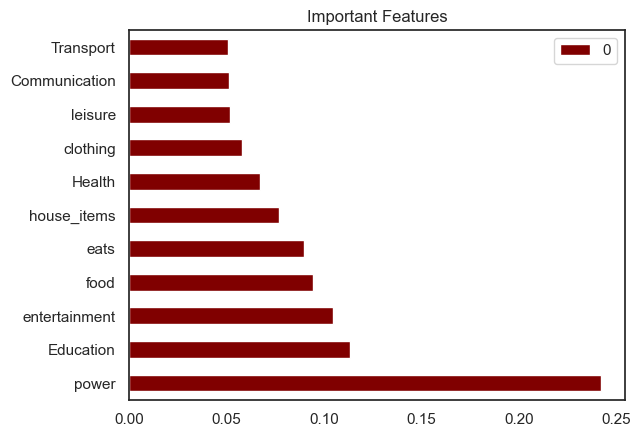

In [113]:

# we get the important features 

from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier(random_state=42)
fi_a = fi.fit(X_alt_train_rs_over, y_alt_train_over)

phl_fi_a = pd.DataFrame(fi_a.feature_importances_, index=X_alt_train_rs_over.columns)
phl_fi_a.nlargest(11, phl_fi_a.columns).plot(kind='barh', color='maroon', title='Important Features')
plt.show()



In [114]:
# Apply PCA on X_train set
pca = PCA(.95)

pca_alt_train = pca.fit(X_alt_train_rs_over, y_alt_train_over)
print(pca_a_train.n_components_)

X_alt_train_rs_over_pca = pd.DataFrame(pca_alt_train.transform(X_alt_train_rs_over))
X_alt_train_rs_over_pca.head()

64


0         1         2         3         4         5
0  2.203178  1.566853  0.717599 -0.276524  0.107085  0.133060
1 -1.649168  1.017453  0.664594  0.004078 -0.162335 -0.083569
2  2.635317 -1.105575 -0.045333 -0.061757  0.360465  0.017907
3  2.674593  1.384413  0.332067  0.048461 -0.133674 -0.095632
4  2.298013 -0.682466  0.400679  0.347545  0.308654 -0.341575

In [115]:
# Apply PCA on X_test set
pca = PCA(.95)

pca_alt_test = pca.fit(X_alt_test_rs_over, y_alt_test_over)
print(pca_alt_test.n_components_)

X_alt_test_rs_over_pca = pd.DataFrame(pca_alt_test.transform(X_alt_test_rs_over))
X_alt_test_rs_over_pca.head()

6


0         1         2         3         4         5
0  0.842242 -1.577474  0.624441  0.124127 -0.375027 -0.170628
1  1.578366  1.446616 -0.270148  0.378391 -0.226630 -0.154626
2  2.495367 -0.488569  0.329247  0.320808  0.348455 -0.085227
3  1.988209 -1.225371  0.162927 -0.289813  0.284415  0.036545
4  0.983777 -1.150963  0.503211 -0.155781  0.037904  0.102976

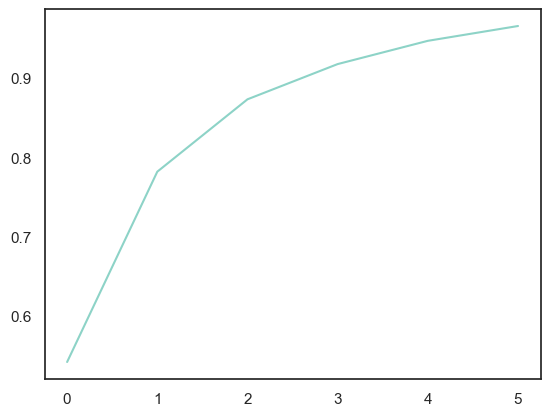

In [116]:
# Dimensionality Reduction (Component-based): PCA
phl_alt_train_processed = pd.concat([X_alt_train_rs_over_pca, y_alt_train_over], axis=1)
phl_alt_train_processed.shape


plt.plot(np.cumsum(pca_alt_train.explained_variance_ratio_))
plt.show()


In [117]:
classifiers = {
    "LogisticsRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    
}

In [118]:
# Compute the training score of each model

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_alt_train_rs_over_pca, y_alt_train_over)
    train_score = round(classifier.score(X_alt_train_rs_over_pca, y_alt_train_over), 2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_alt_test_rs_over_pca, y_alt_test_over),2)
    test_scores.append(test_score)
    
print(train_scores)    
print(test_scores)

[0.91, 0.97, 0.98, 1.0, 1.0]
[0.94, 0.94, 0.94, 0.91, 0.93]


In [119]:
%%time

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_alt_train_rs_over_pca, y_alt_train_over)
    train_score = cross_val_score(classifier, X_alt_train_rs_over_pca, y_alt_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_alt_test_rs_over_pca, y_alt_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)    
print(test_cross_scores)

[0.91, 0.96, 0.97, 0.96, 0.98]
[0.96, 0.97, 0.98, 0.97, 0.98]
CPU times: total: 7.14 s
Wall time: 7.32 s


0.498917748917749


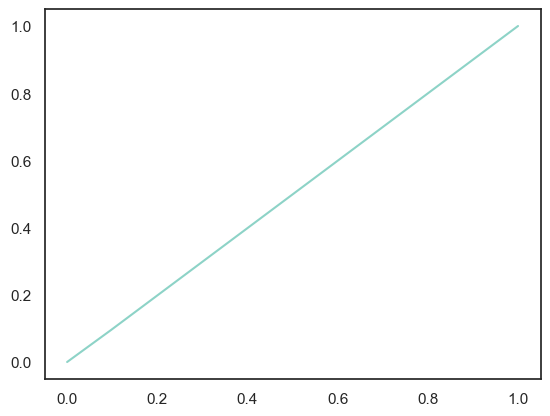

In [120]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


rf = RandomForestClassifier()
rf.fit(X_alt_train_rs_over_pca, y_alt_train_over)
rf_pred = cross_val_predict(rf, X_alt_train_rs_over_pca, y_alt_train_over, cv=5)
rf_pred
print(roc_auc_score(y_alt_test_over, (pd.DataFrame(rf_pred)).iloc[:924,:]))

fpr, tpr, _ = roc_curve(y_alt_test_over, (pd.DataFrame(rf_pred)).iloc[:924,:])
plt.plot(fpr, tpr)
plt.show()